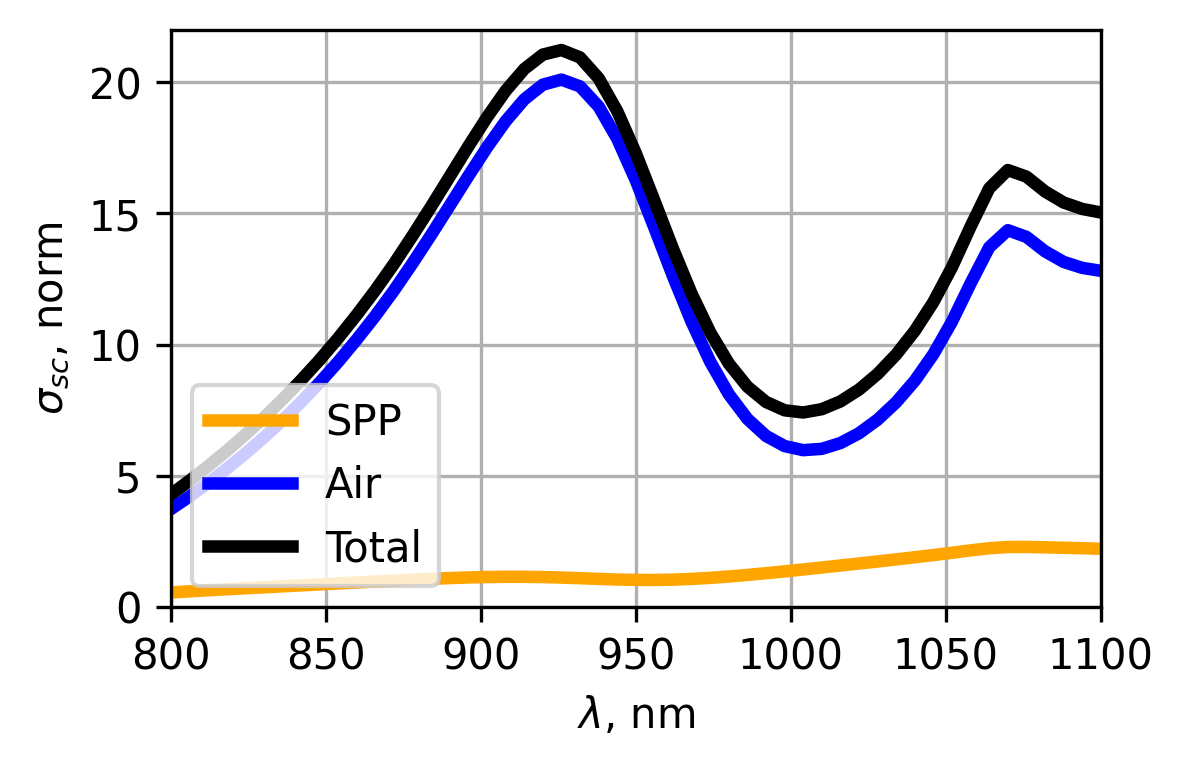

In [4]:
import numpy as np
import matplotlib.pyplot as plt

sigma_sc = np.loadtxt('article_data_plots/sigma_air_sigma_sc_wl_295nm_circ_pol.txt', skiprows=0, delimiter=',')

plt.figure(figsize=(4,2.5), dpi=300)
plt.plot(sigma_sc[:,0], sigma_sc[:,2], label='SPP', color='orange', lw=3)
plt.plot(sigma_sc[:,0], sigma_sc[:,1], label='Air', color='blue', lw=3)
plt.plot(sigma_sc[:,0], sigma_sc[:,1]+sigma_sc[:,2], label='Total', lw=3, c='black')
plt.ylabel(r'$\sigma_{sc}$, norm')
plt.xlabel('$\\lambda$, nm')
plt.grid()
plt.legend(loc='lower left')
plt.xlim(sigma_sc[0,0], sigma_sc[-1,0])
plt.ylim(0,22)
#plt.savefig('article_plots/scat_sc_air_spp.svg', bbox_inches='tight')
plt.show()

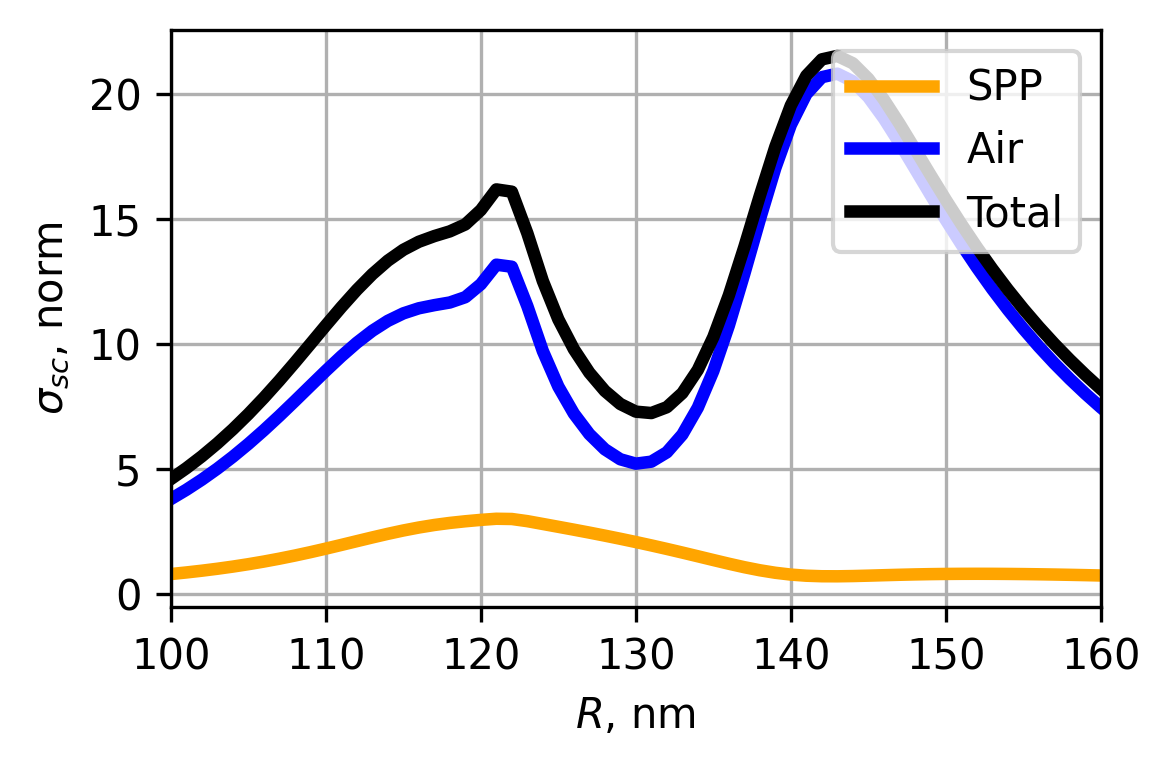

In [6]:
import numpy as np
import matplotlib.pyplot as plt

sigma_sc = np.loadtxt('article_data_plots/sigma_air_sigma_sc_R_900nm_circ_pol.txt', skiprows=0, delimiter=',')

plt.figure(figsize=(4,2.5), dpi=300)
plt.plot(sigma_sc[:,0], sigma_sc[:,2]/(np.pi*(sigma_sc[:,0]*1e-9)**2), label='SPP', color='orange', lw=3)
plt.plot(sigma_sc[:,0], sigma_sc[:,1]/(np.pi*(sigma_sc[:,0]*1e-9)**2), label='Air', color='blue', lw=3)
plt.plot(sigma_sc[:,0], (sigma_sc[:,1]+sigma_sc[:,2])/(np.pi*(sigma_sc[:,0]*1e-9)**2), label='Total', lw=3, c='black')

# plt.plot(sigma_sc[:,0], (sigma_sc[:,1]+sigma_sc[:,2])/(np.pi*(sigma_sc[:,0]*1e-9)**2), label='numerical', lw=3, c='black', ls='--')

# plt.plot(R, (sigma_MD+sigma_ED)/(np.pi*(R*1e-9)**2), label='analytical', color='black', lw=3)

plt.ylabel(r'$\sigma_{sc}$, norm')
plt.xlabel('$R$, nm')
plt.grid()
plt.legend(loc='upper right')
plt.xlim(sigma_sc[0,0], sigma_sc[-26,0])
# plt.ylim(0,22)
#plt.savefig('article_plots/scat_sc_air_spp_fromR.svg', bbox_inches='tight')
plt.show()

### Compare Scattring SC

In [10]:
sigma_dips_comsol = np.loadtxt('article_data_plots/scat multipoles.txt', skiprows=8, delimiter=',')

sigma_int_comsol = np.loadtxt('article_data_plots/sc integr.txt', skiprows=8, delimiter=',')

c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7

wl = 900 * 1e-9

px = sweep_res["px"].apply(lambda x: x.magnitude).to_numpy()
py = sweep_res["py"].apply(lambda x: x.magnitude).to_numpy()
pz = sweep_res["pz"].apply(lambda x: x.magnitude).to_numpy()

mx = sweep_res["mx"].apply(lambda x: x.magnitude).to_numpy()
my = sweep_res["my"].apply(lambda x: x.magnitude).to_numpy()
mz = sweep_res["mz"].apply(lambda x: x.magnitude).to_numpy()

R = sweep_res["R"].apply(lambda x: x.magnitude).to_numpy()

k0 = 2*np.pi/wl

const_sigma_sc = k0**4/(6*np.pi*eps0_const**2)

ED = np.abs(px)**2+ np.abs(py)**2+np.abs(pz)**2

MD = (np.abs(mx)**2+ np.abs(my)**2+np.abs(mz)**2)/c_const**2

sigma_ED = ED *const_sigma_sc
sigma_MD = MD * const_sigma_sc


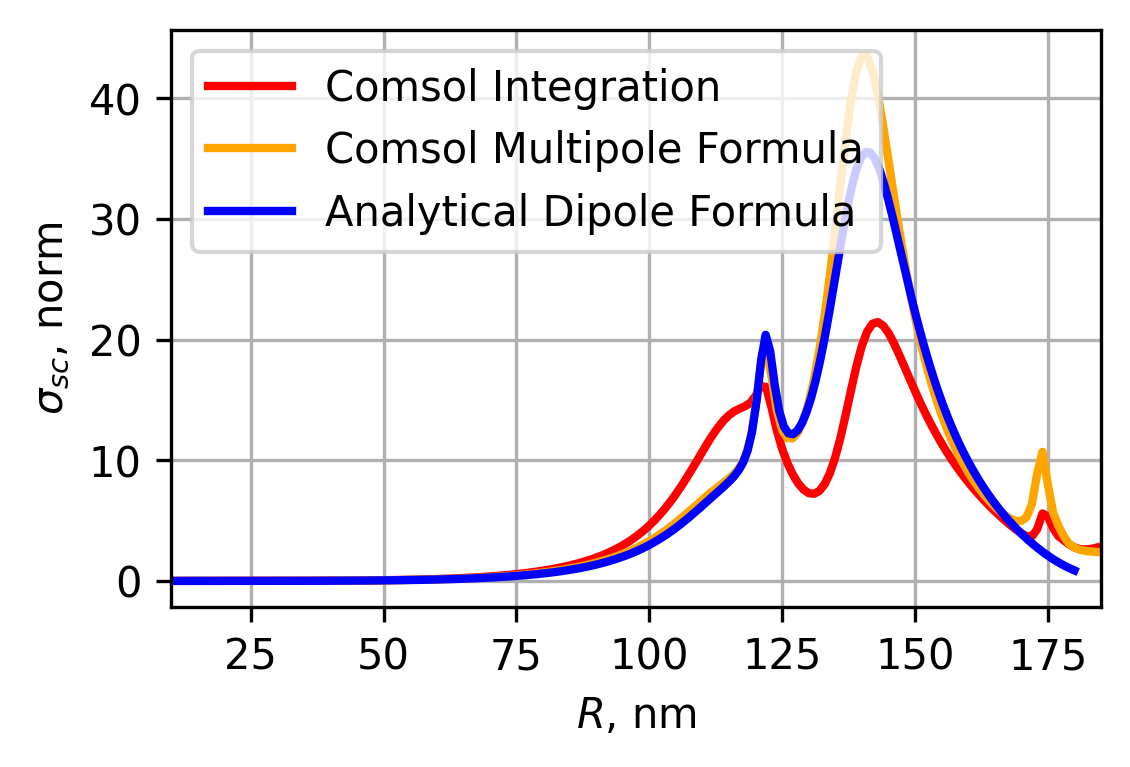

In [11]:
plt.figure(figsize=(4,2.5), dpi=300)


plt.plot(sigma_int_comsol[:,0], (sigma_int_comsol[:,2])/(np.pi*(sigma_int_comsol[:,0]*1e-9)**2), label='Comsol Integration', lw=2, c='red')

plt.plot(sigma_dips_comsol[:,0], (sigma_dips_comsol[:,5])/(np.pi*(sigma_dips_comsol[:,0]*1e-9)**2), label='Comsol Multipole Formula', lw=2, c='orange')

plt.plot(R, (sigma_MD+sigma_ED)/(np.pi*(R*1e-9)**2), label='Analytical Dipole Formula', color='blue', lw=2)

plt.ylabel(r'$\sigma_{sc}$, norm')
plt.xlabel('$R$, nm')
plt.grid()
plt.legend(loc='upper left')
plt.xlim(sigma_int_comsol[0,0], sigma_int_comsol[-1,0])
# plt.ylim(0,22)
#plt.savefig('article_plots/scat_sc_compare_coms_th.png', bbox_inches='tight')
plt.show()

### Directivity heatmaps and pattern

100%|██████████| 100/100 [00:00<00:00, 841.35it/s]


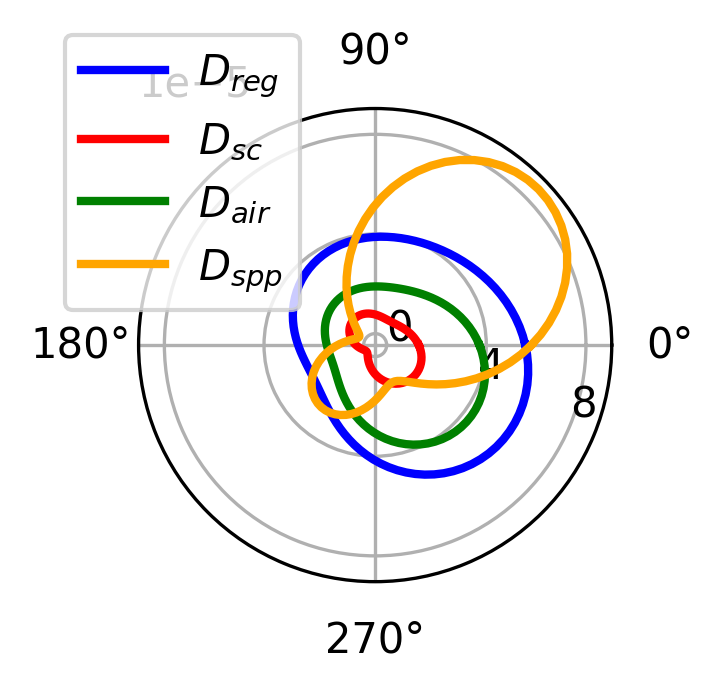

In [ ]:
from MieSppForce.simulation import SimulationConfig, SweepRunner,  DipoleCalculator, OpticalForceCalculator, DiagramCalculator, CylindricalGrid
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import numpy as np
from pint import UnitRegistry
ureg = UnitRegistry()

def get_mean_angle(I, phi):
    vec_sum = np.sum(I * np.exp(1j * phi))
    return np.angle(vec_sum)

def add_axis_line(ax, theta, label, color="k"):
    r_arrow = ax.get_rmax()
    ax.plot([theta, theta], [0, r_arrow], color=color, lw=2, ls='--')
    ax.text(theta+0.1, r_arrow*1.1, label, ha='center', va='center', fontsize=12, fontweight='bold', color=color)


base_config = SimulationConfig(
    wl = 900 * ureg.nanometer,
    R =  110.5 * ureg.nanometer,
    dist = 2 * ureg.nanometer,
    angle = np.deg2rad(25),
    psi = np.deg2rad(45),
    chi = np.deg2rad(22.5),
    show_warnings=False,
    two_beam_setup=False
)

I0 = base_config.c_const.magnitude*base_config.eps0_const.magnitude/2

phi_arr = np.linspace(0,2*np.pi,100)


XOY_AIR = CylindricalGrid(phi=np.linspace(0, 2*np.pi, 100)*ureg.rad, 
                          z=5*(base_config.dist+base_config.R),
                          r=base_config.wl*1)

XOY_SPP = CylindricalGrid(phi=np.linspace(0, 2*np.pi, 100)*ureg.rad, 
                          z=0*ureg.nm, 
                          r=base_config.wl*5)

Diag_reg_XOY = DiagramCalculator(base_config, XOY_AIR, normalize=None).compute('reg')
Diag_air_XOY = DiagramCalculator(base_config, XOY_AIR, normalize=None).compute('air')
Diag_sc_XOY = DiagramCalculator(base_config, XOY_AIR, normalize=None).compute('sc')
Diag_spp_XOY = DiagramCalculator(base_config, XOY_SPP, normalize=None).compute('spp')

Force_res = OpticalForceCalculator(base_config).compute()

Fx_spp = Force_res.as_dict()['Fxspp']
Fy_spp = Force_res.as_dict()['Fyspp']

Fxe0 = Force_res.as_dict()['Fxe0']
Fxm0 = Force_res.as_dict()['Fxm0']

Fx = Force_res.as_dict()['Fx']
Fy = Force_res.as_dict()['Fy']

Fx_reg = Fx - Fxe0 - Fxm0 - Fx_spp 
Fy_reg = Fy - Fy_spp 

# phi_vals_reg = Diag_res_reg.as_array()[:,0]
# intensity_reg = Diag_res_reg.as_array()[:,1]
# phi_reg_max = get_mean_angle(intensity_reg, phi_vals_reg)

# phi_vals_spp = Diag_res_spp.as_array()[:,0]
# intensity_spp = Diag_res_spp.as_array()[:,1]
# phi_spp_max = get_mean_angle(intensity_spp, phi_vals_spp)


fig = plt.figure(dpi=300, figsize=(2.5,2.5))
ax = fig.add_subplot(polar=True)
ax.plot(Diag_reg_XOY.as_array()[:,0], Diag_reg_XOY.as_array()[:,1], color='b', lw=2, label='$D_{reg}$')
ax.plot(Diag_sc_XOY.as_array()[:,0], Diag_sc_XOY.as_array()[:,1], color='r', lw=2, label='$D_{sc}$')
ax.plot(Diag_air_XOY.as_array()[:,0], Diag_air_XOY.as_array()[:,1], color='g', lw=2, label='$D_{air}$')
#ax.arrow(np.atan2(Fy_reg.magnitude, Fx_reg.magnitude), 0, 0, 1, color='blue', width = 0.05, label='$F_{reg}$')

ax.plot(Diag_spp_XOY.as_array()[:,0], Diag_spp_XOY.as_array()[:,1], color='orange', lw=2, label='$D_{spp}$')
#ax.arrow(np.atan2(Fy_spp.magnitude, Fx_spp.magnitude), 0, 0, 1, color='orange', width = 0.05, label='$F_{spp}$')


# plt.title(f'XoY, z=d+R, r = 3R, $\lambda$={base_config.wl.magnitude} nm')
# add_axis_line(ax, 0, "X", color="black")
# add_axis_line(ax, np.pi/2, "Y", color="black")

ax.legend(loc='upper left', bbox_to_anchor=(-0.2, 1.2))
plt.tight_layout()
ax.yaxis.set_major_locator(plt.MaxNLocator(3))  
ax.set_rlabel_position(-22.5) 
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
#plt.savefig(f'article_plots/diag_XoY_air_spp_900_125.svg', dpi=300)

plt.show()


In [55]:
base_config = SimulationConfig(
    wl = 900 * ureg.nanometer,
    R =  110.5 * ureg.nanometer,
    dist = 2 * ureg.nanometer,
    angle = np.deg2rad(25),
    psi = 0,
    chi = np.pi/4,
    show_warnings=False,
    two_beam_setup=False
)

XOY_SPP = CylindricalGrid(phi=np.linspace(0, 2*np.pi, 100)*ureg.rad, 
                          z=0*ureg.nm, 
                          r=base_config.wl*5)

sweep_spp, diagrams_spp, _ = SweepRunner(base_config, 'R', np.linspace(100, 165, 100)*ureg.nm, True, True, True, False, XOY_SPP, 'spp').run(n_jobs=-1)

  0%|          | 0/100 [00:00<?, ?it/s]

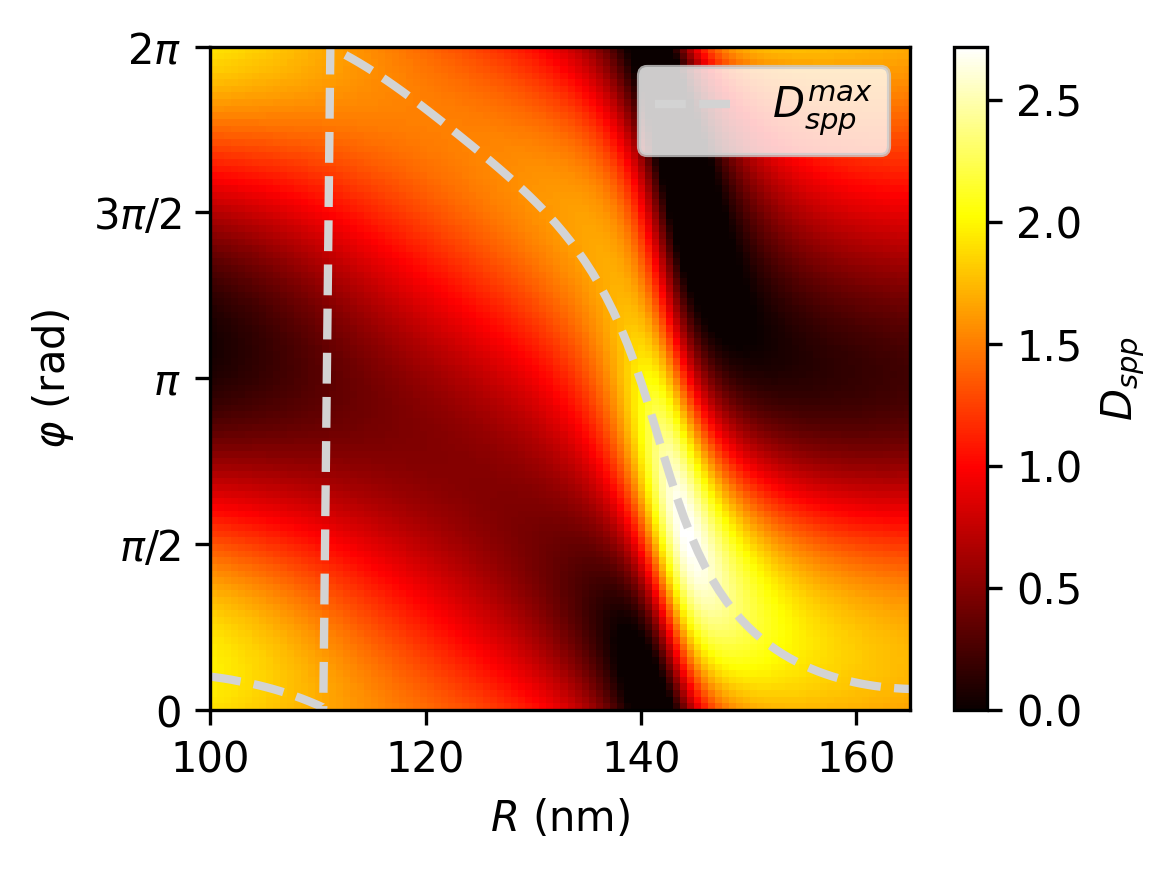

In [56]:
import numpy as np
import matplotlib.pyplot as plt

diagrams_spp["phi"] = diagrams_spp["phi"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)
diagrams_spp["R"]  = diagrams_spp["R"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)

pivot = diagrams_spp.pivot(index="phi", columns="R", values="D")

plt.figure(figsize=(4, 3), dpi=300)

plt.imshow(
    pivot.values.astype(float),
    aspect="auto",
    origin="lower",
    extent=[
        float(pivot.columns.min()), float(pivot.columns.max()),
        float(pivot.index.min()),   float(pivot.index.max())
    ],
    cmap="hot",
    vmin=0
)

phi_values = pivot.index.values.astype(float)
R_values = pivot.columns.values.astype(float)
max_phi_for = []

for r in R_values:
    col = pivot[r].values.astype(float)
    complex_sum = np.sum(col * np.exp(1j * phi_values))
    phi_mean = np.angle(complex_sum)
    if phi_mean < 0:
        phi_mean += 2 * np.pi
    max_phi_for.append(phi_mean)


plt.plot(R_values, max_phi_for, color="lightgray", linewidth=2, label="$D_{spp}^{max}$", ls='--')




plt.colorbar(label="$D_{spp}$")
plt.xlabel("$R$ (nm)")
plt.ylabel("$\\varphi$ (rad)")

yticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
yticklabels = ["$0$", "$\\pi/2$", "$\\pi$", "$3\\pi/2$", "$2\\pi$"]



plt.yticks(yticks, yticklabels)
plt.ylim(0, 2*np.pi)
plt.tight_layout()
plt.legend()
#plt.savefig('article_plots/Dspp_map_R.svg', dpi=300)
plt.show()


In [57]:
num_points = 100

sweep_reg, diagrams_reg, _ = SweepRunner(base_config, 'R', np.linspace(100, 165, num_points)*ureg.nanometer, True, True, True, False, XOY_AIR, 'reg').run(n_jobs=-1)
# sweep_sc, diagrams_sc, _ = SweepRunner(base_config, 'R', np.linspace(100, 165, num_points)*ureg.nanometer, True, True, True, False, XOY_AIR, 'sc', diagram_normalize=None).run(n_jobs=-1)
# sweep_air, diagrams_air, _ = SweepRunner(base_config, 'R', np.linspace(100, 165, num_points)*ureg.nanometer, True, True, True, False, XOY_AIR, 'air', diagram_normalize=None).run(n_jobs=-1)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [33:25<?, ?it/s]


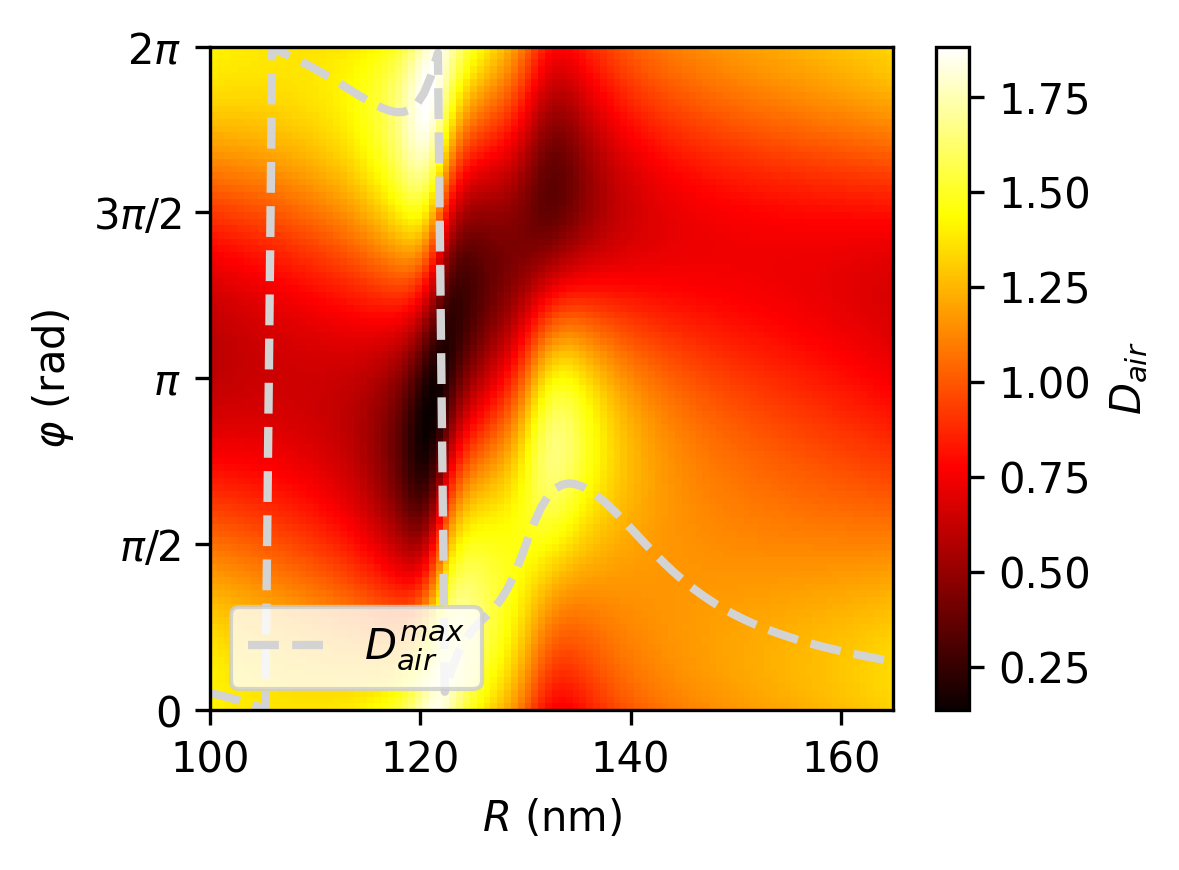

In [58]:
import numpy as np
import matplotlib.pyplot as plt

diagrams_reg["phi"] = diagrams_reg["phi"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)
diagrams_reg["R"]  = diagrams_reg["R"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)

# diagrams_air["phi"] = diagrams_air["phi"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)
# diagrams_air["R"]  = diagrams_air["R"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)

# diagrams_sc["phi"] = diagrams_sc["phi"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)
# diagrams_sc["R"]  = diagrams_sc["R"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)

pivot = diagrams_reg.pivot(index="phi", columns="R", values="D")

# Находим углы максимумов для каждой длины волны
R_values = pivot.columns.values.astype(float)
phi_values = pivot.index.values.astype(float)

max_phi_for_r = []
for r in R_values:
    col = pivot[r].values.astype(float)
    # Интегральное круговое среднее:
    complex_sum = np.sum(col * np.exp(1j * phi_values))
    phi_mean = np.angle(complex_sum)
    if phi_mean < 0:
        phi_mean += 2 * np.pi
    max_phi_for_r.append(phi_mean)


# Построение тепловой карты
plt.figure(figsize=(4, 3), dpi=300)
plt.imshow(
    pivot.values.astype(float),
    aspect="auto",
    origin="lower",
    extent=[
        float(pivot.columns.min()), float(pivot.columns.max()),
        float(pivot.index.min()),   float(pivot.index.max())
    ],
    cmap="hot"
)

plt.plot(R_values, max_phi_for_r, color="lightgray", linewidth=2, label="$D_{air}^{max}$", ls='--')

plt.colorbar(label="$D_{air}$")
plt.xlabel("$R$ (nm)")
plt.ylabel("$\\varphi$ (rad)")

# Установка делений по оси Y в радианах
yticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
yticklabels = ["$0$", "$\\pi/2$", "$\\pi$", "$3\\pi/2$", "$2\\pi$"]
plt.yticks(yticks, yticklabels)

plt.legend(loc="lower left")
plt.tight_layout()
#plt.savefig('article_plots/Dair_R.svg', dpi=300)
plt.show()

# Figure 2

In [59]:
base_config = SimulationConfig(
    wl = 900 * ureg.nanometer,
    R =  (295/2) * ureg.nanometer,
    dist = 2 * ureg.nanometer,
    angle = np.deg2rad(25),
    psi = 0,
    chi = np.pi/4,
    show_warnings=False,
    two_beam_setup=False
)


In [60]:
num_points = 100

sweep_res, diagrams_spp, _ = SweepRunner(base_config, 'R', np.linspace(100, 165, num_points)*ureg.nanometer, True, True, True, False, XOY_SPP, 'spp').run(n_jobs=-1)
# _, diagrams_air, _ = SweepRunner(base_config, 'R', np.linspace(100, 165, num_points)*ureg.nanometer, True, True, False, False, gridCylXoY_reg, 'air').run(n_jobs=-1)
_, diagrams_reg, _ = SweepRunner(base_config, 'R', np.linspace(100, 165, num_points)*ureg.nanometer, True, True, False, False, XOY_AIR, 'reg').run(n_jobs=-1)
# _, diagrams_sc, _ = SweepRunner(base_config, 'R', np.linspace(100, 165, num_points)*ureg.nanometer, True, True, False, False, gridCylXoY_reg, 'sc').run(n_jobs=-1)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:45<?, ?it/s]

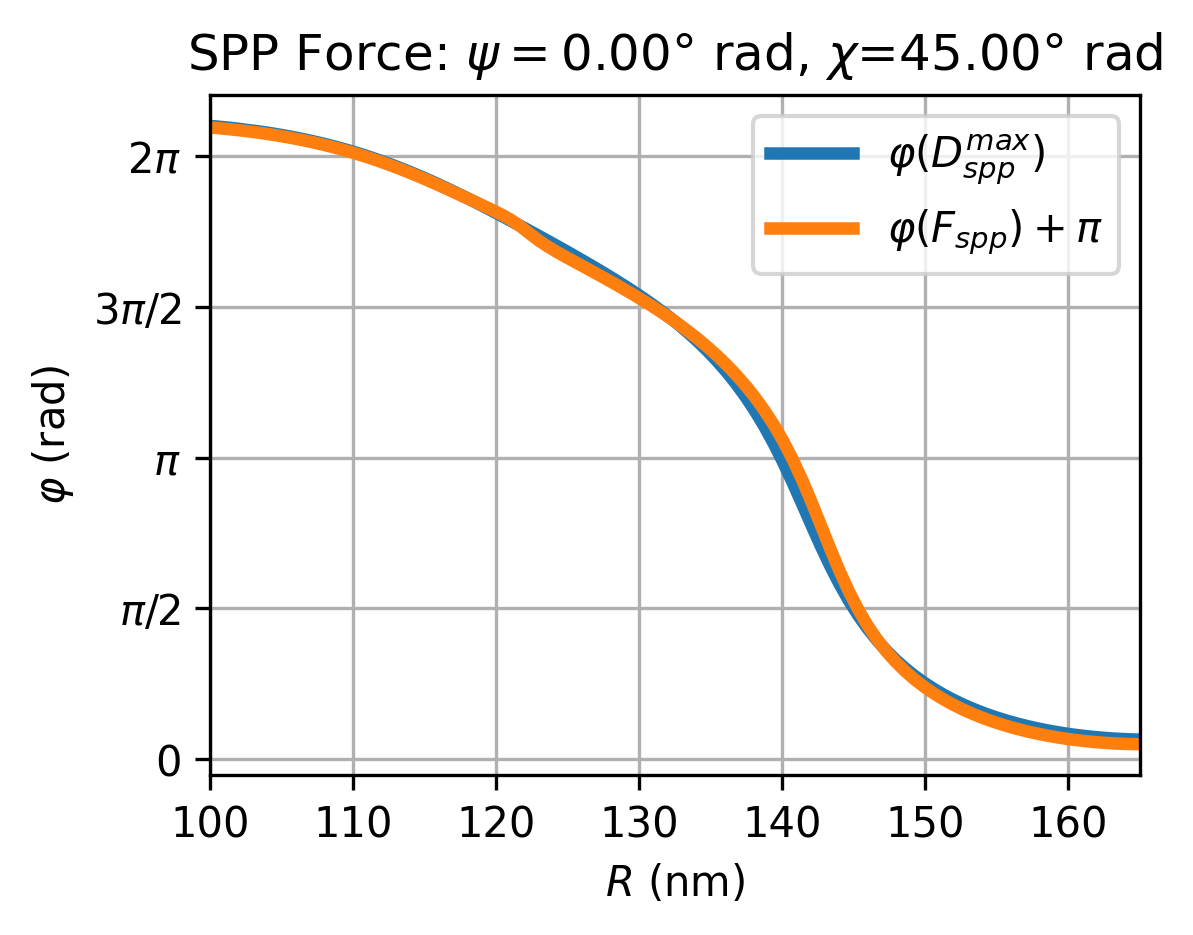

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def circular_mean_phi(df):
    wl_unique = df["R"].unique()
    result = []
    for wl_val in wl_unique:
        sub = df[df["R"] == wl_val]
        phi = sub["phi"].values.astype(float)
        D = sub["D"].values.astype(float)
        complex_sum = np.sum(D * np.exp(1j * phi))
        phi_mean = np.angle(complex_sum)
        # phi_mean = phi[np.argmax(D)]
        # # if phi_mean < 0:
        # #     phi_mean += 2*np.pi
        result.append([wl_val, phi_mean])
    return pd.DataFrame(result, columns=["R", "phi_mean"])


# --- 1. phi_max из диаграмм ---
diagrams_spp["phi"] = diagrams_spp["phi"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)
diagrams_spp["R"]  = diagrams_spp["R"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)

phi_mean_spp = circular_mean_phi(diagrams_spp)


# --- 2. Угол силы ---
Fx = sweep_res["Fx"].apply(lambda x: x.to("N").magnitude).to_numpy()
Fy = sweep_res["Fy"].apply(lambda x: x.to("N").magnitude).to_numpy()
R = sweep_res["R"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x).to_numpy()

Fxe0 = sweep_res["Fxe0"].apply(lambda x: x.to("N").magnitude).to_numpy()
Fxm0 = sweep_res["Fxm0"].apply(lambda x: x.to("N").magnitude).to_numpy()

Fx_nosc = Fx - Fxe0 - Fxm0

Fxspp = sweep_res["Fxspp"].apply(lambda x: x.to("N").magnitude).to_numpy()
Fyspp = sweep_res["Fyspp"].apply(lambda x: x.to("N").magnitude).to_numpy()

Fx_cross = sweep_res["Fxcross"].apply(lambda x: x.to("N").magnitude).to_numpy()
Fy_cross = sweep_res["Fycross"].apply(lambda x: x.to("N").magnitude).to_numpy()


Fy_sc =  Fy - Fyspp 
Fx_sc = Fx - Fxspp - Fxe0 - Fxm0
#Fx_sc = Fx - Fxspp

theta_F = np.arctan2(Fy, Fx)

theta_F_nosc = np.arctan2(Fy, Fx_nosc)

theta_F_spp = np.arctan2(Fyspp, Fxspp)

theta_F_sc = np.arctan2(Fy_sc, Fx_sc)

theta_F_cross = np.arctan2(Fy_cross, Fx_cross)



df_forces = pd.DataFrame({"R": R, "thetaFspp": theta_F_spp, "thetaFnosc": theta_F_nosc, "theta_F": theta_F , "theta_F_sc":theta_F_sc , "theta_F_cross": theta_F_cross})


# df_plot = pd.merge(phi_mean_spp, df_forces, on="R")


plt.figure(figsize=(4,3), dpi=300)

#plt.plot(df_plot["R"], np.unwrap(df_plot["phi_mean"])-2*np.pi, label="$\varphi_D^{max}$", lw=4)

plt.plot(phi_mean_spp["R"], np.unwrap(phi_mean_spp['phi_mean'])+2*np.pi, label="$\\varphi(D_{spp}^{max})$", lw=3)
plt.plot(df_forces["R"], np.unwrap(df_forces["thetaFspp"])+3*np.pi, label="$\\varphi(F_{spp})+\\pi$",  lw=3)

yticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
yticklabels = ["$0$", "$\\pi/2$", "$\\pi$", "$3\\pi/2$", "$2\\pi$"]
plt.yticks(yticks, yticklabels)

plt.xlim(phi_mean_spp["R"].to_numpy()[0],phi_mean_spp["R"].to_numpy()[-1])
plt.xlabel("$R$ (nm)")
plt.ylabel("$\\varphi$ (rad)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.title(f"SPP Force: $\\psi=${np.rad2deg(base_config.psi):.2f}° rad, $\\chi$={np.rad2deg(base_config.chi):.2f}° rad")
#plt.savefig('article_plots/phi_vs_R_spp.svg', dpi=300)

plt.show()

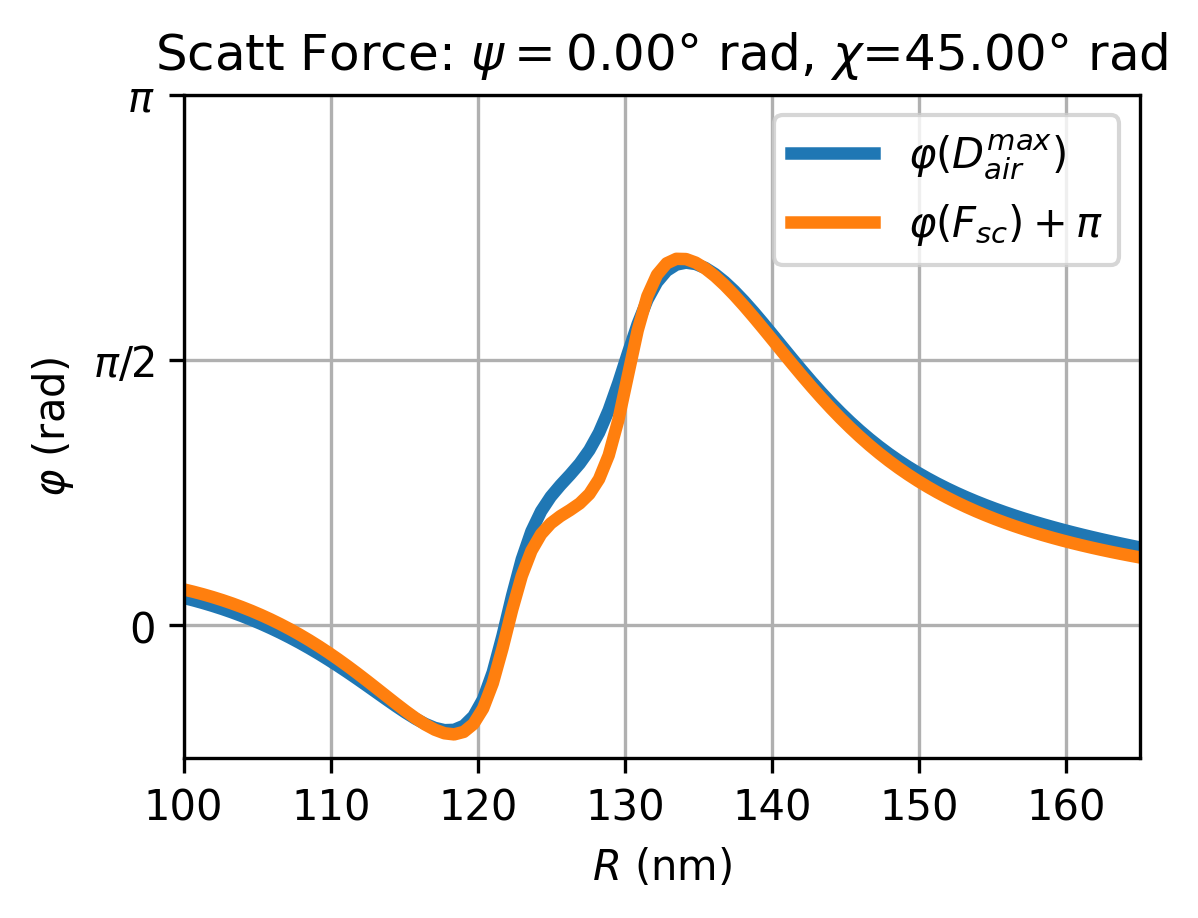

In [62]:
diagrams_reg["phi"] = diagrams_reg["phi"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)
diagrams_reg["R"]  = diagrams_reg["R"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)

phi_mean_reg = circular_mean_phi(diagrams_reg)

plt.figure(figsize=(4,3), dpi=300)

plt.plot(phi_mean_reg["R"], phi_mean_reg['phi_mean']+0*np.pi, label="$\\varphi (D_{air}^{max})$", lw=3)
plt.plot(df_forces["R"], np.unwrap(df_forces["theta_F_sc"])+np.pi, label="$\\varphi(F_{sc})+\\pi$",  lw=3)
# plt.plot(df_forces["R"], np.unwrap(df_forces["theta_F_cross"])+np.pi, label="$\\varphi(F_{\\times})+\\pi$",  lw=3)


# yticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
# yticklabels = ["$0$", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"]
# yticks = [np.pi, 3*np.pi/2, 2*np.pi]
# yticklabels = ["$\\pi$", "$3\\pi/2$", "$2\\pi$"]
yticks = [0, np.pi/2, np.pi]
yticklabels = ["$0$", "$\\pi/2$", "$\\pi$"]
plt.yticks(yticks, yticklabels)

plt.xlim(phi_mean_spp["R"].to_numpy()[0],phi_mean_spp["R"].to_numpy()[-1])
plt.xlabel("$R$ (nm)")
plt.ylabel("$\\varphi$ (rad)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.title(f"Scatt Force: $\\psi=${np.rad2deg(base_config.psi):.2f}° rad, $\\chi$={np.rad2deg(base_config.chi):.2f}° rad")
#plt.savefig('article_plots/phi_vs_R_air.svg', dpi=300)

plt.show()

In [30]:
#Free Space

base_config_free_space = SimulationConfig(
    wl = base_config.wl,
    R =  (295/2) * ureg.nanometer,
    dist = 2 * ureg.nanometer,
    angle = np.deg2rad(0),
    a_angle = 0,
    phase= 0,
    substrate='Air'
)

sweep_res_free_space, _, _ = SweepRunner(base_config_free_space, 'R', np.linspace(100, 160, 185)*ureg.nanometer, True, False, True, False).run()

F0 = np.max(np.abs(sweep_res_free_space['Fz'].to_numpy()))

  0%|          | 0/185 [00:00<?, ?it/s]

  0%|          | 0/185 [00:00<?, ?it/s]

In [31]:
f_coms_tot = np.loadtxt('article_data_plots/tot_force.txt', delimiter=',', skiprows=8)
f_coms_press = np.loadtxt('article_data_plots/press_force.txt', delimiter=',', skiprows=8)


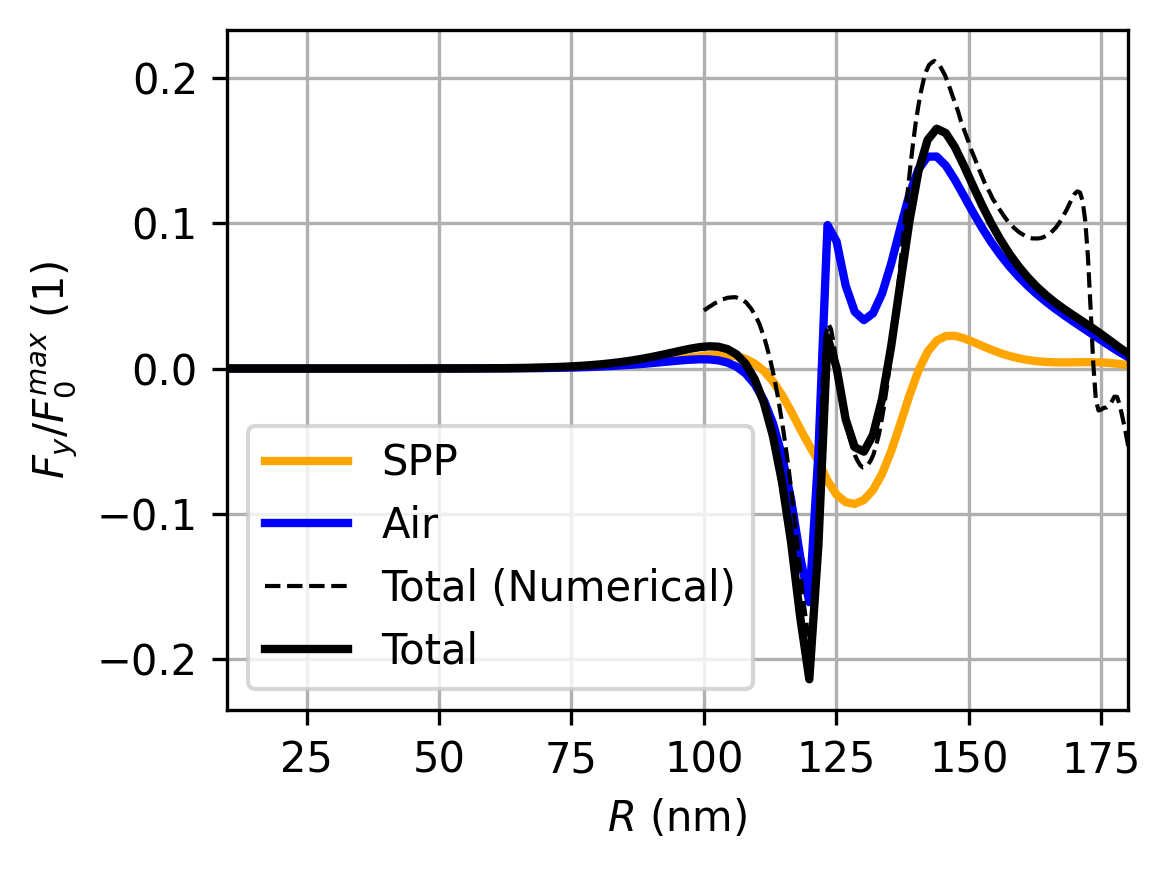

In [32]:
plt.figure(figsize=(4,3), dpi=300)

#plt.plot(df_plot["R"], np.unwrap(df_plot["phi_mean"])-2*np.pi, label="$\varphi_D^{max}$", lw=4)

#plt.plot(phi_mean_air["R"], np.unwrap(df_plot["phi_mean"])+2*np.pi, label="$\varphi (D_{air}^{max})$", lw=3)
plt.plot(df_forces["R"], Fyspp/F0, label="SPP", c='orange', lw=2)
plt.plot(df_forces["R"], Fy_sc/F0, label="Air", c='blue', lw=2)
plt.plot(f_coms_tot[:,0], f_coms_tot[:,2]/F0, label="Total (Numerical)", c='black', lw=1, ls='--')

plt.plot(df_forces["R"], Fy/F0, label="Total", c='black', lw=2)


plt.xlim(phi_mean_spp["R"].to_numpy()[0],phi_mean_spp["R"].to_numpy()[-1])
plt.xlabel("$R$ (nm)")
plt.ylabel("$F_y/F_0^{max}$ (1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig('article_plots/Fy_vs_R_air.svg', dpi=300)

plt.show()

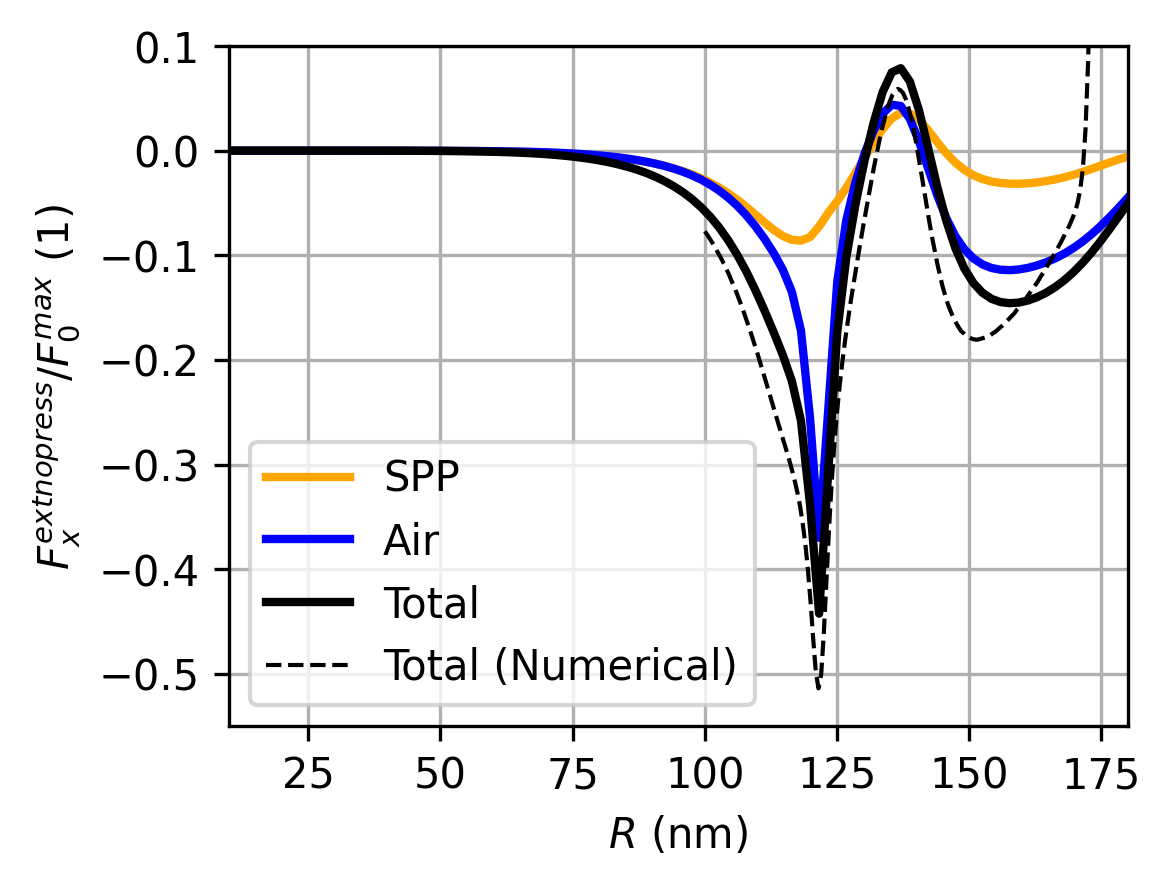

In [33]:
plt.figure(figsize=(4,3), dpi=300)

#plt.plot(df_plot["R"], np.unwrap(df_plot["phi_mean"])-2*np.pi, label="$\varphi_D^{max}$", lw=4)

#plt.plot(phi_mean_air["R"], np.unwrap(df_plot["phi_mean"])+2*np.pi, label="$\varphi (D_{air}^{max})$", lw=3)
plt.plot(df_forces["R"], Fxspp/F0, label="SPP", c='orange', lw=2)
plt.plot(df_forces["R"], (Fx_sc)/F0, label="Air", c='blue', lw=2)
plt.plot(df_forces["R"], (Fx-Fxe0-Fxm0)/F0, label="Total", c='black', lw=2)
plt.plot(f_coms_tot[:,0], (f_coms_tot[:,1]-f_coms_press[:,1]-f_coms_press[:,2])/F0, label="Total (Numerical)", c='black', lw=1, ls='--')


plt.xlim(phi_mean_spp["R"].to_numpy()[0],phi_mean_spp["R"].to_numpy()[-1])
plt.xlabel("$R$ (nm)")
plt.ylabel("$F_x^{\text{no press}}/F_0^{max}$ (1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(-0.55, 0.1)
#plt.savefig('article_plots/Fx_vs_R_air.svg', dpi=300)

plt.show()

In [ ]:
from MieSppForce.simulation import SimulationConfig, SweepRunner,  DipoleCalculator, OpticalForceCalculator, DiagramCalculator, CylindricalGrid
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import numpy as np
from pint import UnitRegistry
ureg = UnitRegistry()

base_config = SimulationConfig(
    wl = 900 * ureg.nanometer,
    R =  (295/2) * ureg.nanometer,
    dist = 2 * ureg.nanometer,
    angle = np.deg2rad(25),
    a_angle = np.pi/4,
    phase= np.pi/2,
    show_warnings=False,
    two_beam_setup=True
)


polar_param = np.linspace(0,np.pi/2, 200)

sweep_res_from_a, _,_ = SweepRunner(base_config, 'a_angle', polar_param, True, False, True).run(n_jobs=1)

In [ ]:
Fxe0 = sweep_res_from_a["Fxe0"].apply(lambda x: x.to("N").magnitude).to_numpy()
Fxm0 = sweep_res_from_a["Fxm0"].apply(lambda x: x.to("N").magnitude).to_numpy()

plt.figure(figsize=(5,3), dpi=300)

plt.plot(polar_param, Fxe0, label='$F_x^{e0}$')

plt.plot(polar_param, Fxm0, label='$F_x^{m0}$')


plt.plot(polar_param, Fxe0+Fxm0, label='$F_x^{0}$')

plt.grid()


plt.axvline(np.pi/4)
# plt.axvline(polar_param[np.argmin(np.abs(Fxe0+Fxm0))])
# print(polar_param[np.argmin(np.abs(Fxe0+Fxm0))])
plt.xlabel('a angle (rad)')
plt.legend()

In [34]:
force_comsol = np.loadtxt('article_data_plots/tot force comsol.txt', skiprows=8, delimiter=',')

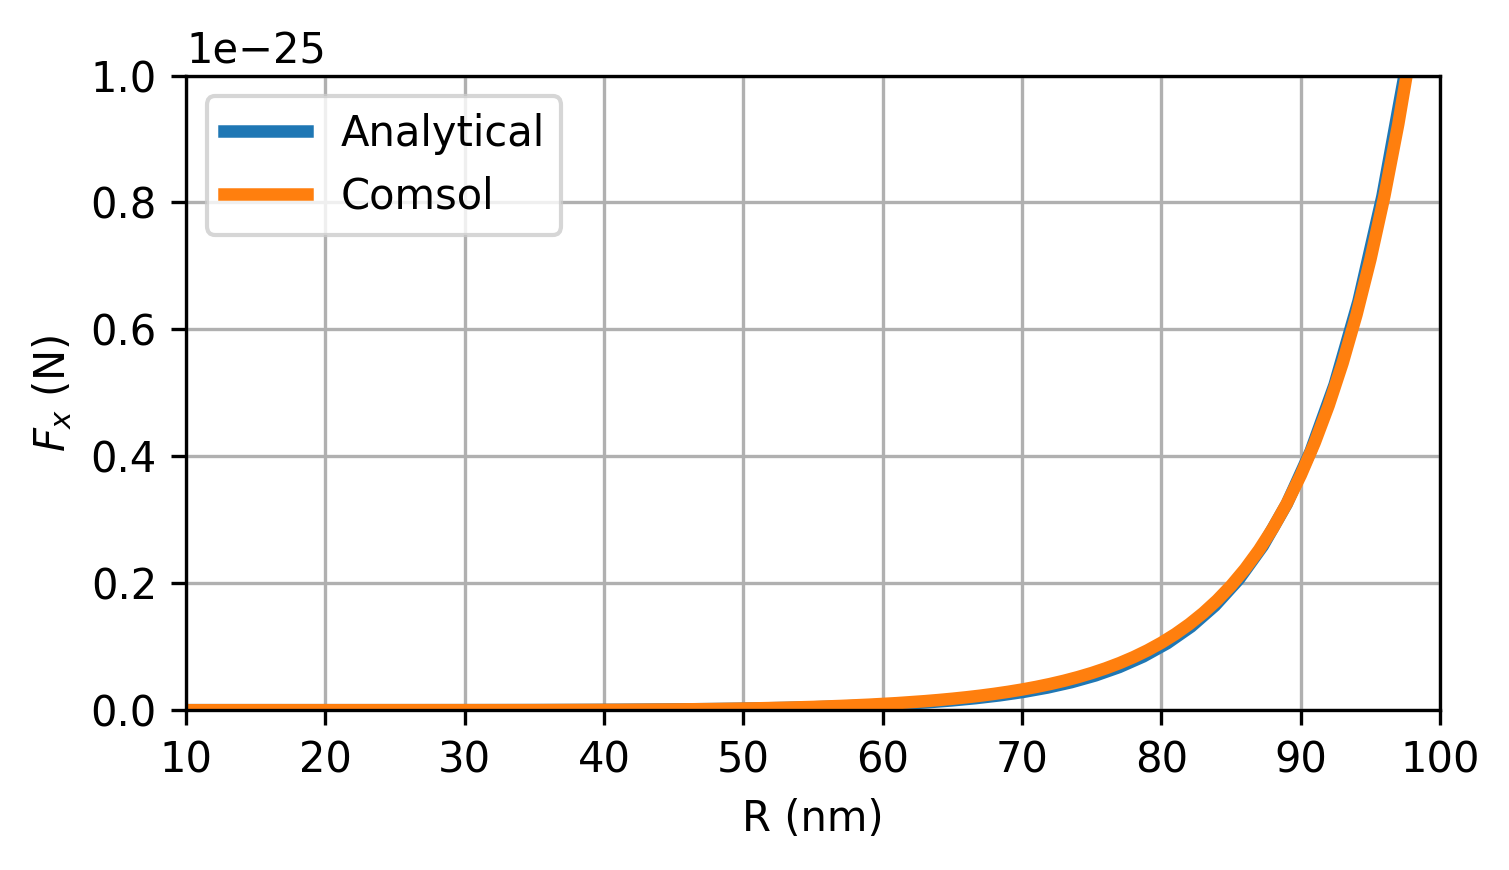

In [35]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(R, Fx, label='Analytical', lw=3)
plt.plot(force_comsol[:,0], force_comsol[:,1], label='Comsol', lw=3)
plt.legend()
plt.xlabel('R (nm)')
plt.ylabel('$F_x$ (N)')
plt.grid()
plt.tight_layout()
plt.xlim(10,100)
plt.ylim(0,1e-25)
#plt.savefig('article_plots/Fx_vs_R_comsol_compare_scaled.png', dpi=300)
plt.show()

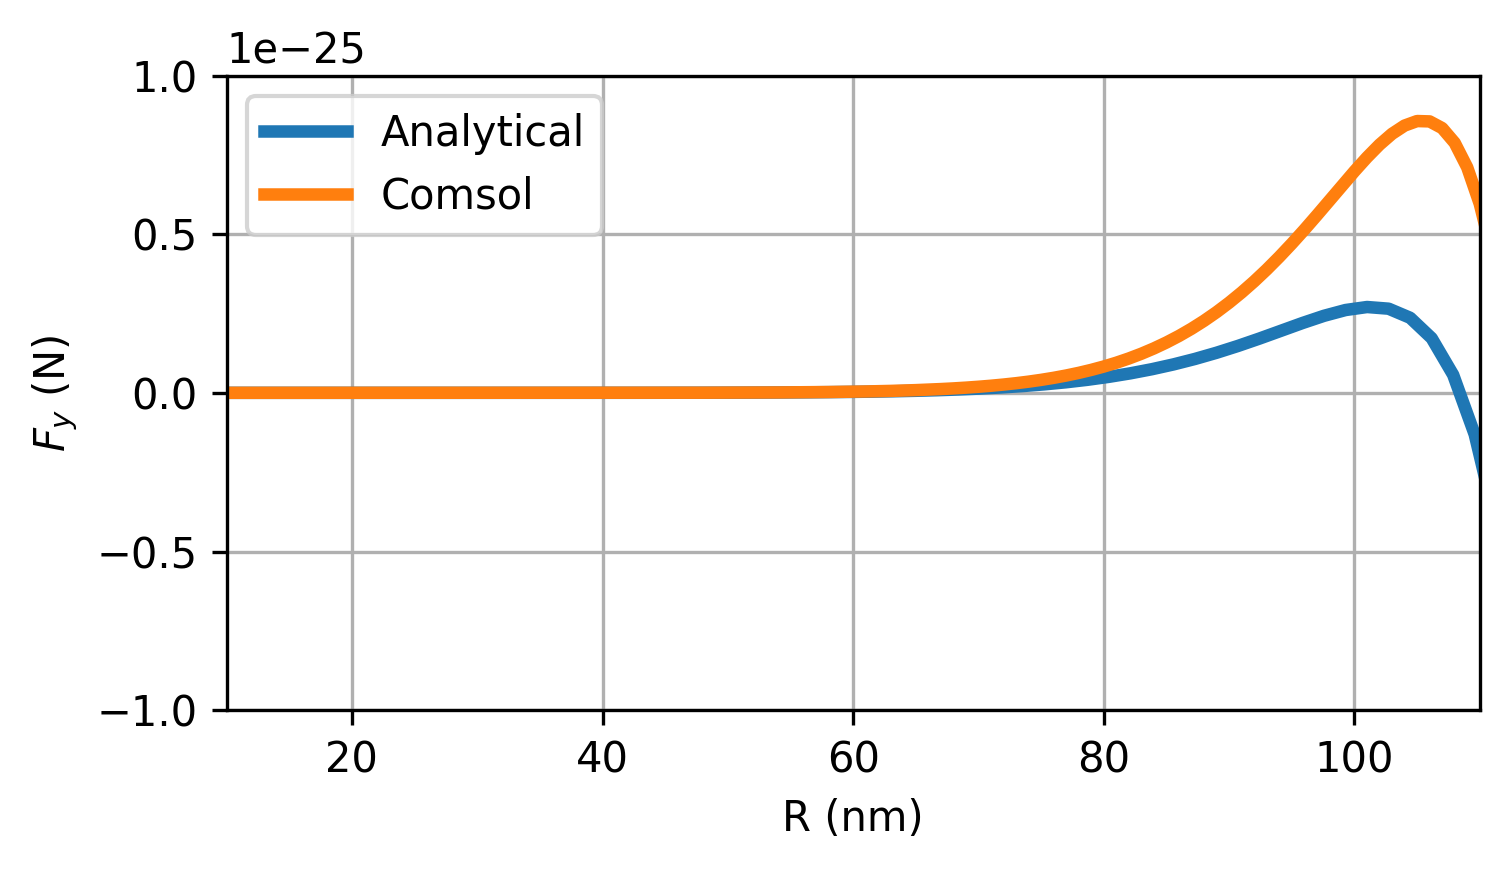

In [36]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(R, Fy, label='Analytical', lw=3)
plt.plot(force_comsol[:,0], force_comsol[:,2], label='Comsol', lw=3)
plt.legend()
plt.xlabel('R (nm)')
plt.ylabel('$F_y$ (N)')
plt.grid()
plt.tight_layout()
plt.xlim(10,110)
plt.ylim(-1e-25,1e-25)
#plt.savefig('article_plots/Fy_vs_R_comsol_compare_scaled.png', dpi=300)
plt.show()


In [37]:
from MieSppForce.force import field_dx
from MieSppForce.dipoles import initial_field
from MieSppForce import frenel

p_coms = np.loadtxt('article_data_plots/p_dips.txt', skiprows=8, delimiter=',')
m_coms = np.loadtxt('article_data_plots/m_dips.txt', skiprows=8, delimiter=',')

px = p_coms[:,1] - 1j * p_coms[:,2]
py = p_coms[:,3] - 1j * p_coms[:,4]
pz = p_coms[:,5] - 1j * p_coms[:,6]

mx = m_coms[:,1] - 1j * m_coms[:,2]
my = m_coms[:,3] - 1j * m_coms[:,4]
mz = m_coms[:,5] - 1j * m_coms[:,6]


epsAu = frenel.get_interpolate('Au')
dist = 2

R_coms = p_coms[:,0]

dEdx = np.zeros((len(R_coms), 3), dtype=complex)
dHdx = np.zeros((len(R_coms), 3), dtype=complex)

for i in range(len(R_coms)):
    dEdx[i,:], dHdx[i,:] = field_dx(initial_field, 900, np.deg2rad(25), 1, epsAu, point=[0,0,dist+R_coms[i]], phase=np.pi/2, a_angle=np.pi/4)

In [38]:
Fx_press_e = 0.5*np.real( px.conj() * dEdx[:,0] + py.conj() * dEdx[:,1] + pz.conj() * dEdx[:,2] )

Fx_press_m = 0.5*np.real( mx.conj() * dHdx[:,0] + my.conj() * dHdx[:,1] + mz.conj() * dHdx[:,2] )*mu0_const

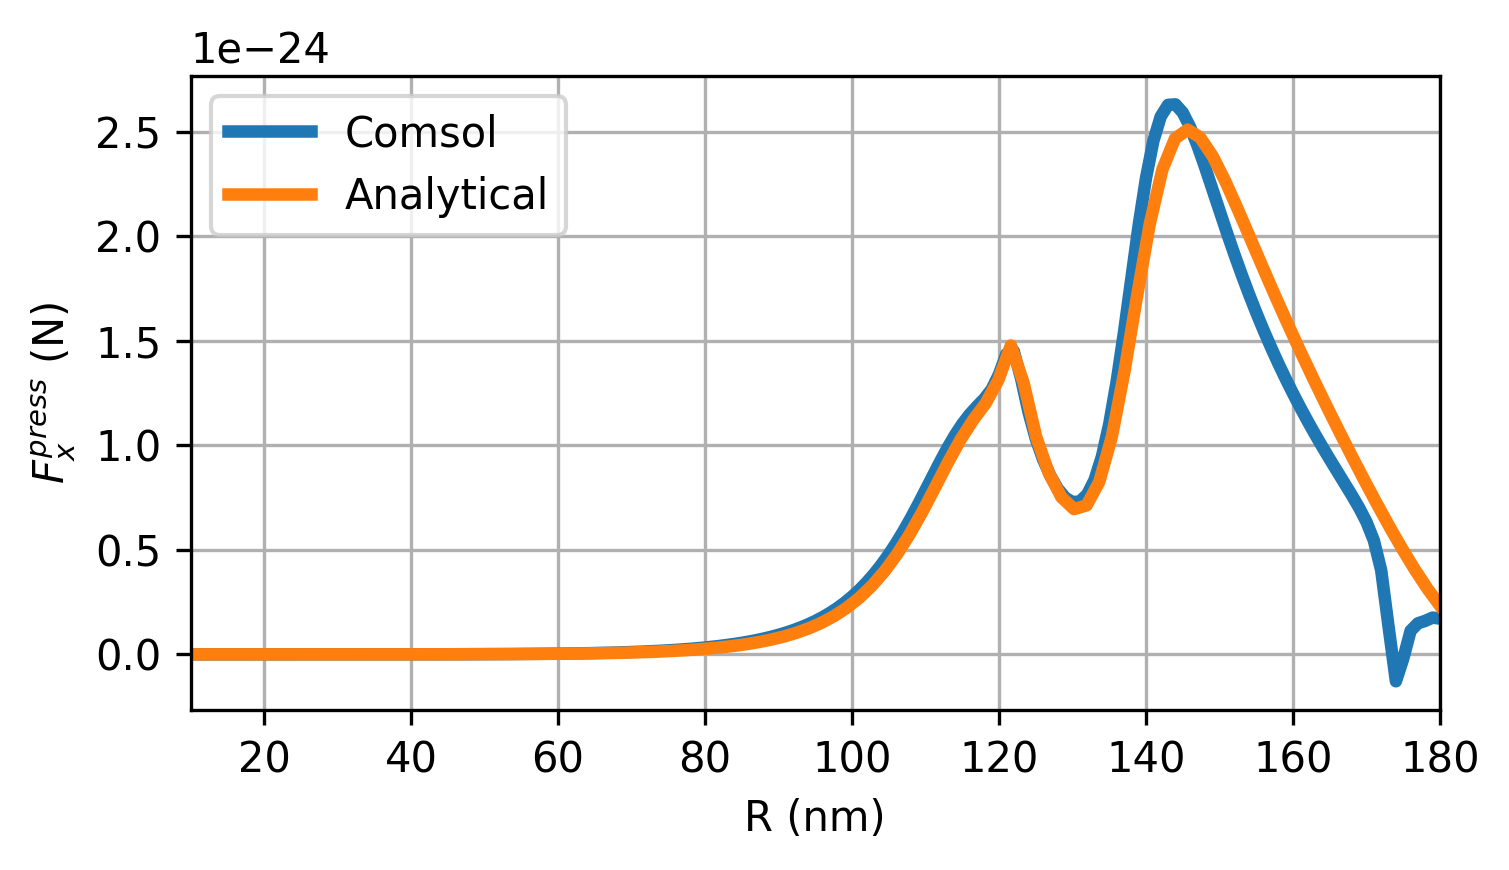

In [39]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(R_coms,  Fx_press_e + Fx_press_m, label='Comsol', lw=3)
plt.plot(R, Fxe0+Fxm0, label='Analytical', lw=3)
plt.legend()
plt.grid()
plt.xlabel('R (nm)')
plt.ylabel('$F_x^{press}$ (N)')
plt.tight_layout()
plt.xlim(10,180)
#plt.savefig('article_plots/Fx_press_vs_R_comsol_compare.png', dpi=300)
plt.show()

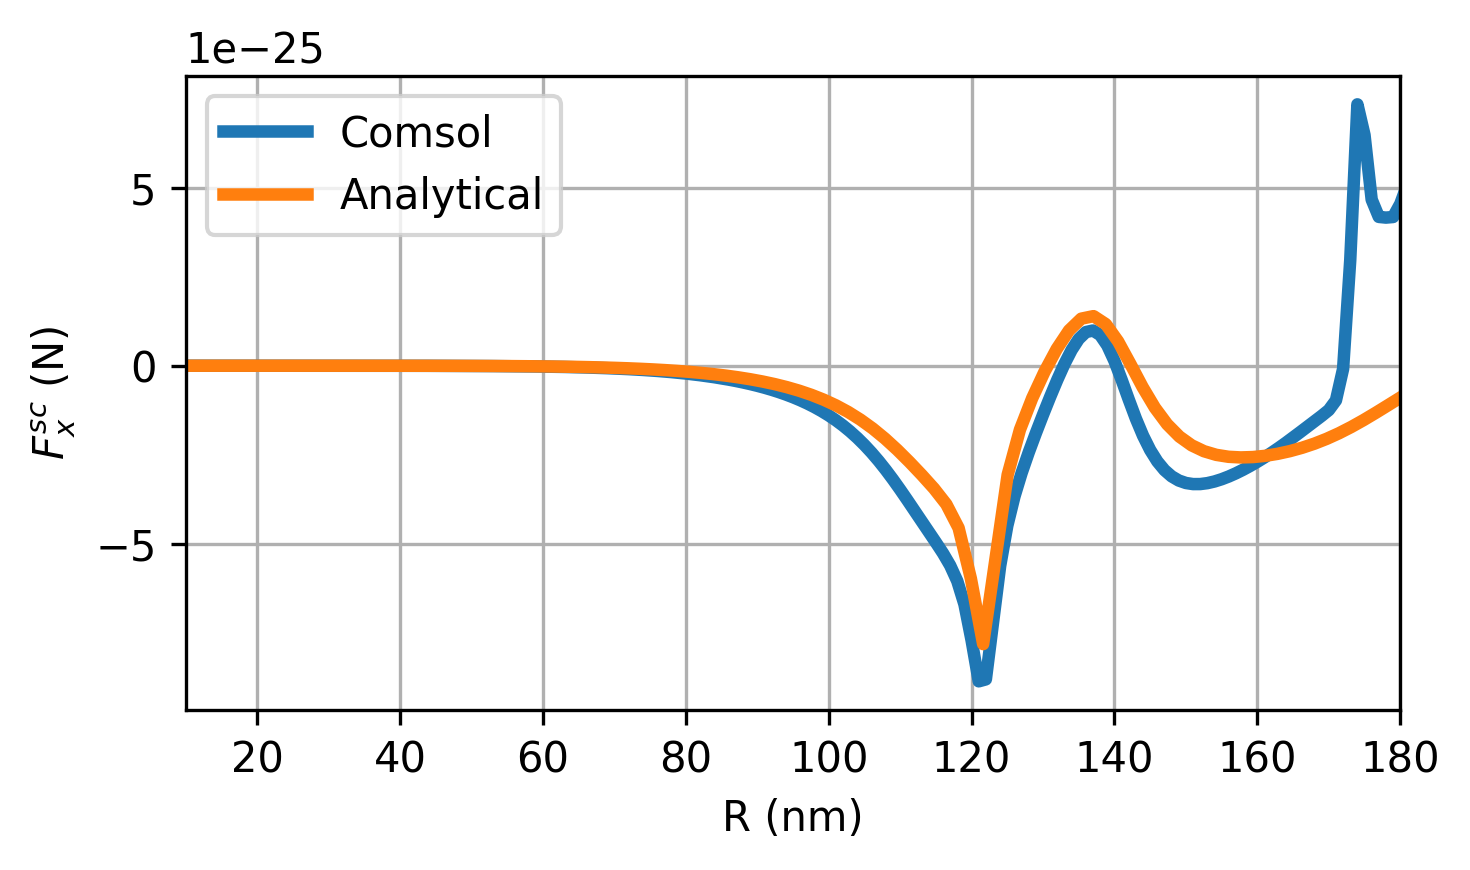

In [40]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(R_coms,  force_comsol[:,1] - Fx_press_e - Fx_press_m, label='Comsol', lw=3)
plt.plot(R, Fx - Fxe0-Fxm0, label='Analytical', lw=3)
plt.legend()
plt.grid()
plt.xlabel('R (nm)')
plt.ylabel('$F_x^{sc}$ (N)')
plt.tight_layout()
plt.xlim(10,180)
#plt.savefig('article_plots/Fx_sc_vs_R_comsol_compare.png', dpi=300)
plt.show()

        

In [4]:

def beta_delta_from_psichi(psi, chi, tol=1e-12):
    if not (0.0 <= psi <= np.pi):
        raise ValueError("psi вне диапазона [0, π]")
    if not (-np.pi/4 <= chi <= np.pi/4):
        raise ValueError("chi вне диапазона [-π/4, π/4]")

    cos2beta = np.clip(np.cos(2*psi) * np.cos(2*chi), -1.0, 1.0)
    beta = 0.5 * np.arccos(cos2beta)

    sin2beta = np.sqrt(max(0.0, 1.0 - cos2beta**2))
    if sin2beta < tol:  # линейная поляризация
        return beta, 0.0

    sin_delta = np.clip(np.sin(2*chi) / sin2beta, -1.0, 1.0)
    cos_delta = np.clip(np.tan(2*psi) * cos2beta / sin2beta, -1.0, 1.0)
    delta = (np.arctan2(sin_delta, cos_delta)) % (2*np.pi)
    return beta, delta


In [44]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

psi_slider = widgets.FloatSlider(min=0, max=np.pi, step=0.01, value=0, description='ψ')
chi_slider = widgets.FloatSlider(min=-np.pi/4, max=np.pi/4, step=0.01, value=np.pi/8, description='χ')

out = widgets.Output()
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
plt.close(fig)

def draw_ellipse(psi, chi):
    beta, delta = beta_delta_from_psichi(psi, chi)
    t = np.linspace(0, 2*np.pi, 400)
    Ex = np.cos(beta) * np.cos(t)
    Ey = np.sin(beta) * np.cos(t + delta)

    ax.clear()
    ax.plot(Ex, Ey, color='blue', lw=2, label="Эллипс поляризации")

    idx = 60
    ax.annotate(
        "",
        xy=(Ex[idx - 4], Ey[idx - 4]),
        xytext=(Ex[idx], Ey[idx]),
        arrowprops=dict(arrowstyle="->", color="purple", lw=2)
    )
    handedness = "правое" if chi > 0 else "левое" if chi < 0 else "линейное"
    ax.text(0.05, 0.9, f"Направление: {handedness}", transform=ax.transAxes, color="purple", fontsize=11)

    a = np.cos(chi)
    b = np.sin(abs(chi))
    major_axis = np.array([a*np.cos(psi), a*np.sin(psi)])
    minor_axis = np.array([-b*np.sin(psi), b*np.cos(psi)])
    ax.plot([0, major_axis[0]], [0, major_axis[1]], 'r', lw=2, label="Большая ось")
    ax.plot([0, minor_axis[0]], [0, minor_axis[1]], 'g', lw=2, label="Малая ось")

    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"ψ={psi:.3f}, χ={chi:.3f}, β={beta:.3f}, δ={delta:.3f}")
    ax.set_xlabel("TM")
    ax.set_ylabel("TE")
    # ax.legend()
    ax.grid(True)

    with out:
        out.clear_output(wait=True)
        display(fig)

def on_change(_):
    draw_ellipse(psi_slider.value, chi_slider.value)

for slider in (psi_slider, chi_slider):
    slider.observe(on_change, names='value')

ui = widgets.VBox([widgets.HBox([psi_slider, chi_slider]), out])
display(ui)
draw_ellipse(psi_slider.value, chi_slider.value)

In [12]:
from MieSppForce.simulation import SimulationConfig, SweepRunner2D
import numpy as np
from pint import UnitRegistry
ureg = UnitRegistry()

chi_fixed = np.pi/8
R_values = np.linspace(100, 165, 200) * ureg.nanometer
#chi_values = np.linspace(-np.pi/4,  np.pi/4, 200)
psi_values = np.linspace(0, np.pi, 200)
# psi_fixed = 0

base_config_R_psi = SimulationConfig(
    wl=900 * ureg.nanometer,
    R=R_values[0],
    dist=2 * ureg.nanometer,
    angle=np.deg2rad(25),
    # chi = chi_values[0],
    # psi = psi_fixed,
    chi = chi_fixed,
    psi = psi_values[0],
    show_warnings=False,
    two_beam_setup=False,
)



runner_R_psi = SweepRunner2D(
    base_config_R_psi,
    primary_param="R",
    primary_values=R_values,
    secondary_param="psi",
    secondary_values=psi_values,
    compute_dipoles=True,
    compute_diagram=False,
    compute_force=True,
    compute_fields=False,
    parallel_param="primary",
    enable_parallel=True
)

df_sweep_R_psi, _, _ = runner_R_psi.run(n_jobs=-1)
df_sweep_R_psi.head()

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/50 [02:15<?, ?it/s]


,R,psi,px,py,pz,mx,my,mz,Fx,Fxe0,...,Fxsppe1,Fxsppe2,Fxsppm1,Fxsppm2,Fyspp,Fysppe1,Fysppe2,Fysppm1,Fysppm2,Fzspp
0,100.0 nanometer,0.000000,(9.696005669453615e-32-1.6711993416077447e-31j...,(7.509746726847856e-32+3.910980414232804e-32j)...,(4.685605507988247e-32+5.816195673695521e-32j)...,(-6.0975125678022106e-24+8.165442088243195e-24...,(-2.0153244976663247e-23-1.5352301957954908e-2...,(3.686844198562208e-24+7.3679325423309715e-25j...,9.341544857639887e-26 newton,1.7280640278438185e-25 newton,...,-2.5671174162074866e-26 newton,-1.6674689085034755e-26 newton,6.900311292318687e-29 newton,-4.1997997211393275e-26 newton,-1.0871251530934365e-26 newton,-4.831765946394394e-27 newton,-3.74363877358046e-26 newton,-8.327440463025269e-29 newton,3.148017655589488e-26 newton,-7.59864244581672e-25 newton
1,100.0 nanometer,0.015787,(9.695004754667131e-32-1.671026824368254e-31j)...,(7.633998761322002e-32+3.674287896234856e-32j)...,(4.685121814806078e-32+5.815595270142827e-32j)...,(-5.8403442992934816e-24+8.358794592203332e-24...,(-2.015116456524638e-23-1.5350717145965296e-23...,(3.710486725135141e-24+6.204689804403225e-25j)...,9.343858550926819e-26 newton,1.7280097247141297e-25 newton,...,-2.5665874385557285e-26 newton,-1.667340021530592e-26 newton,6.908614231896957e-29 newton,-4.198731325714337e-26 newton,-1.196014335990618e-26 newton,-5.180322188647466e-27 newton,-3.7494289113645313e-26 newton,-8.866482139997089e-29 newton,3.080313276378657e-26 newton,-7.598392612281806e-25 newton
2,100.0 nanometer,0.031574,(9.692002388201641e-32-1.6705093377834229e-31j...,(7.759755458316389e-32+3.43849278896462e-32j) ...,(4.683670917877252e-32+5.813794286166256e-32j)...,(-5.584532928624683e-24+8.553761140258112e-24j...,(-2.0144924116452154e-23-1.534596330833999e-23...,(3.734882057976502e-24+5.04340855494113e-25j) ...,9.35079732444946e-26 newton,1.7278468694557997e-25 newton,...,-2.5649980338937063e-26 newton,-1.6669534890892852e-26 newton,6.933514774080982e-29 newton,-4.19552720443915e-26 newton,-1.3047949757822024e-26 newton,-5.528530982457972e-27 newton,-3.755213277413337e-26 newton,-9.40498648850245e-29 newton,3.012676386365435e-26 newton,-7.597643360716574e-25 newton
3,100.0 nanometer,0.047361,(9.686999703914764e-32-1.6696470772844587e-31j...,(7.886972179088972e-32+3.203685699733862e-32j)...,(4.681253365139719e-32+5.810793401915757e-32j)...,(-5.330177466792145e-24+8.750271191517534e-24j...,(-2.0134525987015e-23-1.5338042240387808e-23j)...,(3.7600223940692955e-24+3.884530463918949e-25j...,9.36235426148349e-26 newton,1.727575624406265e-25 newton,...,-2.5623507865745526e-26 newton,-1.6663096964834953e-26 newton,6.974988097468765e-29 newton,-4.190190551251543e-26 newton,-1.4133586375607224e-26 newton,-5.87604522572752e-27 newton,-3.7609861057450055e-26 newton,-9.942416715695454e-29 newton,2.9451744074727304e-26 newton,-7.59639543799128e-25 newton
4,100.0 nanometer,0.063148,(9.679998592155919e-32-1.6684403686911702e-31j...,(8.015605581274323e-32+2.969958017168993e-32j)...,(4.6778700701069356e-32+5.806593751326531e-32j...,(-5.0773781035166474e-24+8.948255594137175e-24...,(-2.0119974106045137e-23-1.5326956935219126e-2...,(3.7859005800017544e-24+2.7284989259411327e-25...,9.37851784182552e-26 newton,1.727196259948513e-25 newton,...,-2.5586483354319651e-26 newton,-1.6654092854596933e-26 newton,7.032992860549688e-29 newton,-4.1827266858434715e-26 newton,-1.5215971027071148e-26 newton,-6.2225185087008235e-27 newton,-3.766741641878707e-26 newton,-1.0478237099437882e-28 newton,2.8778746271411125e-26 newton,-7.594650088062428e-25 newton


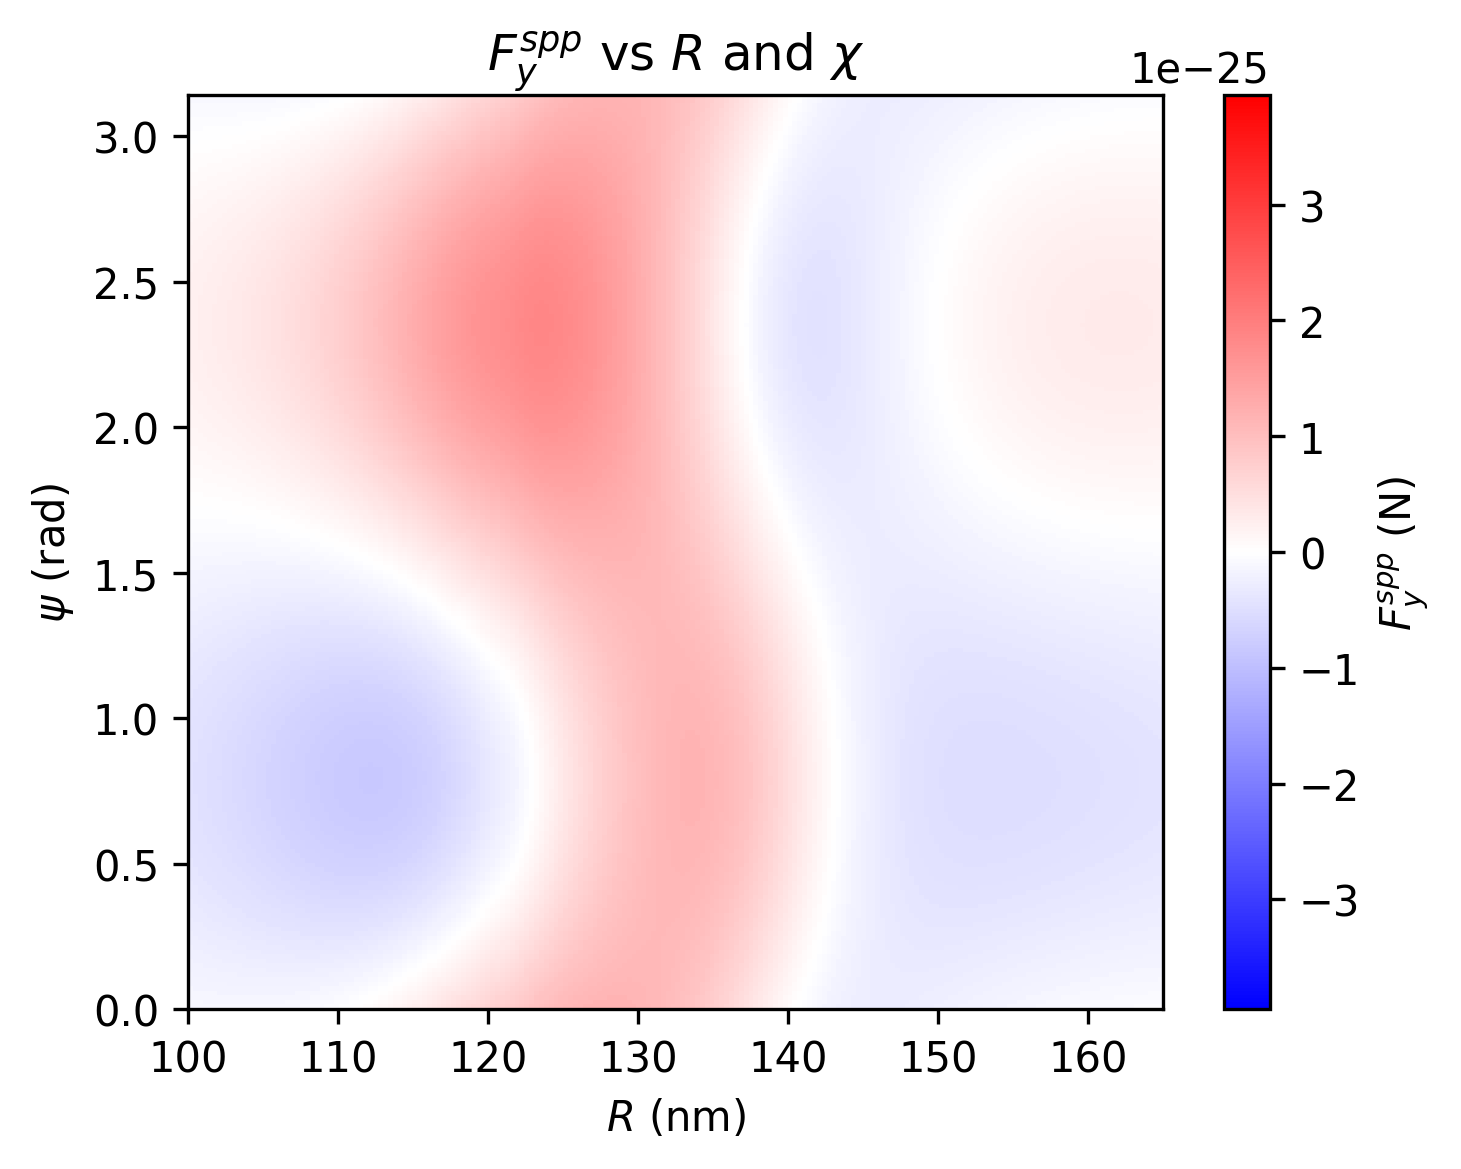

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

def _to_numeric(value, unit=None):
    if hasattr(value, "to"):
        return value.to(unit).magnitude if unit else value.magnitude
    if hasattr(value, "magnitude"):
        return value.magnitude
    return float(value)

sweep_par_y = 'psi'

heatmap_r_psi = df_sweep_R_psi.copy()
heatmap_r_psi["R_nm"] = heatmap_r_psi["R"].apply(lambda v: _to_numeric(v, "nanometer"))
heatmap_r_psi[sweep_par_y+"_rad"] = heatmap_r_psi[sweep_par_y].apply(_to_numeric)
heatmap_r_psi["Fy_N_full"] = heatmap_r_psi["Fy"].apply(lambda v: _to_numeric(v, "newton"))
heatmap_r_psi["Fy_N_spp"] = heatmap_r_psi["Fyspp"].apply(lambda v: _to_numeric(v, "newton"))
heatmap_r_psi["Fy_N_air"] = heatmap_r_psi["Fy_N_full"] - heatmap_r_psi["Fy_N_spp"]

plt_comp = 'spp'

if plt_comp == 'air':
    pivot_r_psi = heatmap_r_psi.pivot(index=sweep_par_y+"_rad", columns="R_nm", values="Fy_N_air")
elif plt_comp == 'spp':
    pivot_r_psi = heatmap_r_psi.pivot(index=sweep_par_y+"_rad", columns="R_nm", values="Fy_N_spp")
elif plt_comp == 'tot':
    pivot_r_psi = heatmap_r_psi.pivot(index=sweep_par_y+"_rad", columns="R_nm", values="Fy_N_full")
    
    
pivot_r_psi_full = heatmap_r_psi.pivot(index=sweep_par_y+"_rad", columns="R_nm", values="Fy_N_full")
pivot_r_psi_full = pivot_r_psi_full.sort_index().sort_index(axis=1)

pivot_r_psi = pivot_r_psi.sort_index().sort_index(axis=1)

vmax = np.nanmax(np.abs(pivot_r_psi_full.values)) or 1.0
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0.0, vmax=vmax)

fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
im = ax.imshow(
    pivot_r_psi.values,
    origin="lower",
    aspect="auto",
    extent=[pivot_r_psi.columns.min(), pivot_r_psi.columns.max(), pivot_r_psi.index.min(), pivot_r_psi.index.max()],
    cmap="bwr",
    norm=norm,
)

cbar = plt.colorbar(im, ax=ax, label="$F_y^{spp}$ (N)")
ax.set_xlabel("$R$ (nm)")
ax.set_ylabel(f"$\\{sweep_par_y}$ (rad)")
ax.set_title(f"$F_y^{{{plt_comp}}}$ vs $R$ and $\\chi$")
# ax.set_yticks([-np.pi/4,-np.pi/8, 0,np.pi/8, np.pi/4])
# ax.set_yticklabels(["$-\\pi/4$", "$-\\pi/8$", "0", "$\\pi/8$", "$\\pi/4$"])
plt.tight_layout()
plt.show()

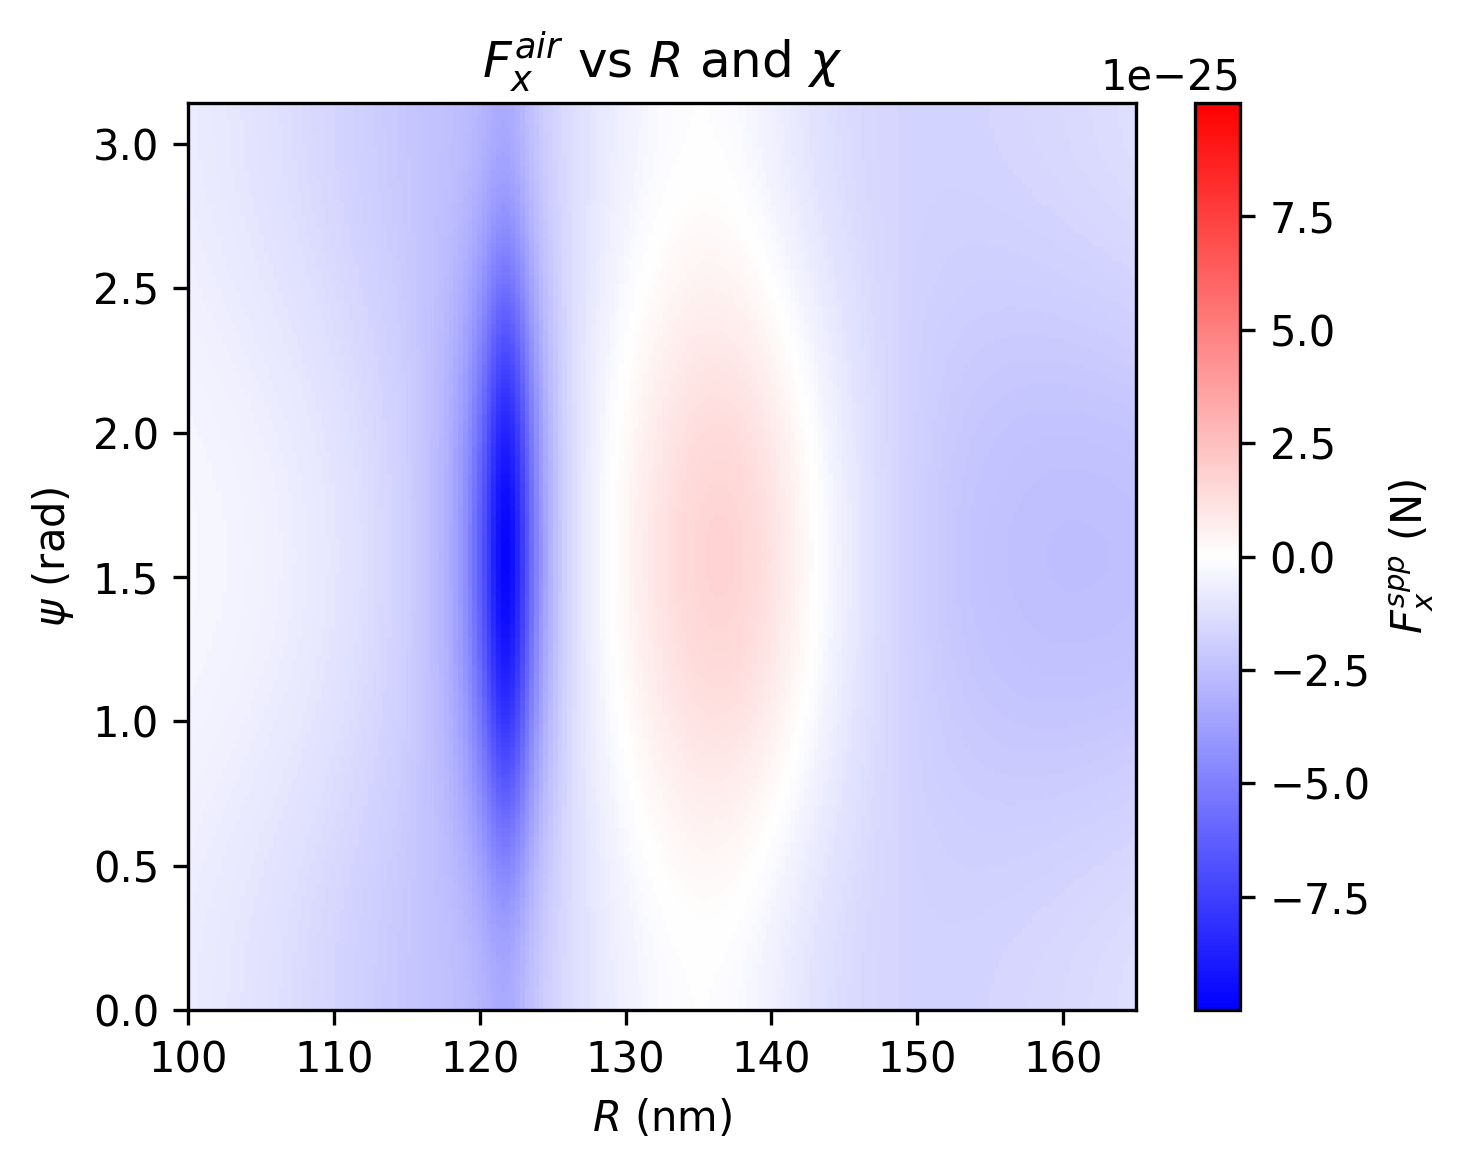

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

def _to_numeric(value, unit=None):
    if hasattr(value, "to"):
        return value.to(unit).magnitude if unit else value.magnitude
    if hasattr(value, "magnitude"):
        return value.magnitude
    return float(value)

sweep_par_y = 'psi'

heatmap_r_psi = df_sweep_R_psi.copy()
heatmap_r_psi["R_nm"] = heatmap_r_psi["R"].apply(lambda v: _to_numeric(v, "nanometer"))
heatmap_r_psi[sweep_par_y+"_rad"] = heatmap_r_psi[sweep_par_y].apply(_to_numeric)
heatmap_r_psi["Fx_N_full_sc"] = heatmap_r_psi["Fx"].apply(lambda v: _to_numeric(v, "newton"))
heatmap_r_psi["Fx_N_e0"] = heatmap_r_psi["Fxe0"].apply(lambda v: _to_numeric(v, "newton"))
heatmap_r_psi["Fx_N_m0"] = heatmap_r_psi["Fxm0"].apply(lambda v: _to_numeric(v, "newton"))

heatmap_r_psi["Fx_N_full"] = heatmap_r_psi["Fx_N_full_sc"] - heatmap_r_psi["Fx_N_e0"] - heatmap_r_psi["Fx_N_m0"] 
heatmap_r_psi["Fx_N_spp"] = heatmap_r_psi["Fxspp"].apply(lambda v: _to_numeric(v, "newton"))
heatmap_r_psi["Fx_N_air"] = heatmap_r_psi["Fx_N_full"] - heatmap_r_psi["Fx_N_spp"]

plt_comp = 'air'

if plt_comp == 'air':
    pivot_r_psi = heatmap_r_psi.pivot(index=sweep_par_y+"_rad", columns="R_nm", values="Fx_N_air")
elif plt_comp == 'spp':
    pivot_r_psi = heatmap_r_psi.pivot(index=sweep_par_y+"_rad", columns="R_nm", values="Fx_N_spp")
elif plt_comp == 'tot':
    pivot_r_psi = heatmap_r_psi.pivot(index=sweep_par_y+"_rad", columns="R_nm", values="Fx_N_full")
    
    
pivot_r_psi_full = heatmap_r_psi.pivot(index=sweep_par_y+"_rad", columns="R_nm", values="Fx_N_full")
pivot_r_psi_full = pivot_r_psi_full.sort_index().sort_index(axis=1)

pivot_r_psi = pivot_r_psi.sort_index().sort_index(axis=1)

vmax = np.nanmax(np.abs(pivot_r_psi_full.values)) or 1.0
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0.0, vmax=vmax)

fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
im = ax.imshow(
    pivot_r_psi.values,
    origin="lower",
    aspect="auto",
    extent=[pivot_r_psi.columns.min(), pivot_r_psi.columns.max(), pivot_r_psi.index.min(), pivot_r_psi.index.max()],
    cmap="bwr",
    norm=norm,
)

cbar = plt.colorbar(im, ax=ax, label="$F_x^{spp}$ (N)")
ax.set_xlabel("$R$ (nm)")
ax.set_ylabel(f"$\\{sweep_par_y}$ (rad)")
ax.set_title(f"$F_x^{{{plt_comp}}}$ vs $R$ and $\\chi$")
# ax.set_yticks([-np.pi/4,-np.pi/8, 0,np.pi/8, np.pi/4])
# ax.set_yticklabels(["$-\\pi/4$", "$-\\pi/8$", "0", "$\\pi/8$", "$\\pi/4$"])
plt.tight_layout()
plt.show()

# Fixed R changing psi

In [46]:
def plot_directivity_heatmap(df, param_col, param_label, max_method = 'complex',val_col="D", title_suffix="", cmap="hot"):
    df_clean = df.copy()
    for col in [param_col, "phi", val_col]:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)

    pivot = df_clean.pivot(index="phi", columns=param_col, values=val_col)
    
    param_values = pivot.columns.values.astype(float)
    phi_values = pivot.index.values.astype(float)

    max_phi_list = []
    for p_val in param_values:
        col_data = pivot[p_val].values.astype(float)
        if max_method == 'complex':
            complex_sum = np.sum(col_data * np.exp(1j * phi_values))
            phi_mean = np.angle(complex_sum)
        elif max_method == 'max':
            np.argmax_val = np.argmax(col_data)
            phi_mean = phi_values[np.argmax_val]
        if phi_mean < 0:
            phi_mean += 2 * np.pi
        max_phi_list.append(phi_mean)

    fig, ax = plt.subplots(figsize=(5, 3.5), dpi=300)
    
    im = ax.imshow(
        pivot.values.astype(float),
        aspect="auto",
        origin="lower",
        extent=[
            float(param_values.min()), float(param_values.max()),
            float(phi_values.min()),   float(phi_values.max())
        ],
        cmap=cmap,
        vmin=0
    )
    
    ax.plot(param_values, max_phi_list, color="cyan", linewidth=2, ls='--', label="$\\varphi_{max}$")
    
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(f"${val_col}$")
    
    ax.set_xlabel(param_label)
    ax.set_ylabel("$\\varphi$ (rad)")
    ax.set_title(f"Directivity Map {title_suffix}")
    
    yticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
    yticklabels = ["$0$", "$\\pi/2$", "$\\pi$", "$3\\pi/2$", "$2\\pi$"]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    ax.set_ylim(0, 2*np.pi)
    
    ax.legend(loc="lower right")
    plt.tight_layout()
    plt.show()



In [72]:
base_config_psi = SimulationConfig(
    wl=900 * ureg.nanometer,
    R=(295/2)*ureg.nanometer,
    dist=2 * ureg.nanometer,
    angle=np.deg2rad(25),
    chi=np.pi/8,
    psi = 0,
    show_warnings=False,
    two_beam_setup=False,
)

In [73]:
from MieSppForce.simulation import CylindricalGrid, SweepRunner


sweep_psi, diagrams_psi_spp , _ = SweepRunner(base_config_psi, 'psi', np.linspace(0, np.pi, 100), True, True, True, False, XOY_SPP, 'spp').run(n_jobs=-1)
#sweep_psi_air, diagrams_psi_air , _ = SweepRunner(base_config_psi, 'chi', np.linspace(-np.pi/4, np.pi/4, 100), True, True, False, False, XoY, 'air').run(n_jobs=-1)
sweep_psi_reg, diagrams_psi_reg , _ = SweepRunner(base_config_psi, 'psi', np.linspace(0, np.pi, 100), True, True, False, False, XOY_AIR, 'reg').run(n_jobs=-1)
#sweep_psi_sc, diagrams_psi_sc , _ = SweepRunner(base_config_psi, 'chi', np.linspace(-np.pi/4, np.pi/4, 100), True, True, False, False, XoY, 'sc').run(n_jobs=-1)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

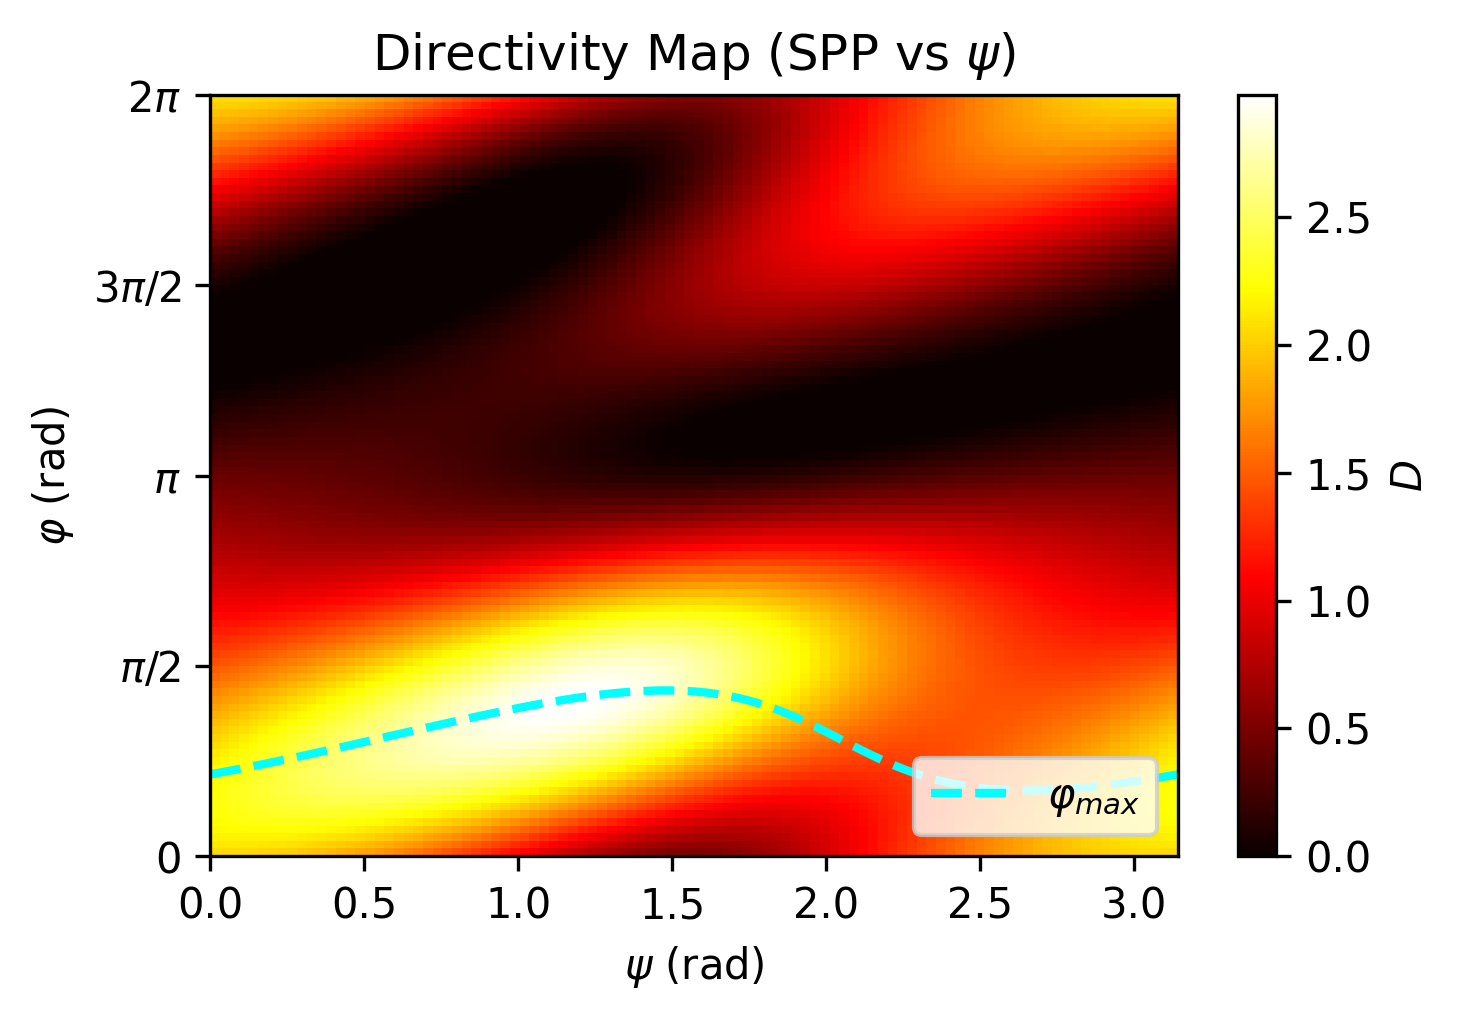

In [80]:
import matplotlib.pyplot as plt

plot_directivity_heatmap(
    diagrams_psi_spp, 
    param_col="psi", 
    param_label="$\\psi$ (rad)", 
    title_suffix="(SPP vs $\\psi$)",
    max_method='complex'
)

In [67]:
def plot_force_directivity_comparison(diagrams_df, sweep_df, param_col, param_label, component='spp', title_suffix="", max_method='complex', complex_par=1, ymax=np.pi/2, ymin = 0, ytick_step=np.pi/8):
    from fractions import Fraction

    df_diag = diagrams_df.copy()
    for col in [param_col, "phi", "D"]:
        if col in df_diag.columns:
            df_diag[col] = df_diag[col].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)

    def get_angle_metric(df):
        unique_vals = df[param_col].unique()
        result = []
        for val in unique_vals:
            sub = df[df[param_col] == val]
            phi = sub["phi"].values.astype(float)
            D = sub["D"].values.astype(float)
            
            if max_method == 'complex':
                # Взвешенное среднее направление
                complex_sum = np.sum(D**complex_par * np.exp(1j * phi))
                phi_mean = np.angle(complex_sum)
            elif max_method == 'max':
                # Угол максимума
                idx = np.argmax(D)
                phi_mean = phi[idx]
            else:
                raise ValueError(f"Unknown max_method: {max_method}")

            # Нормализация 0..2pi (опционально, но удобно для старта)
            if phi_mean < 0:
                phi_mean += 2*np.pi
            result.append([val, phi_mean])
        return pd.DataFrame(result, columns=[param_col, "phi_mean"]).sort_values(by=param_col)

    df_phi_mean = get_angle_metric(df_diag)
    
    force_data = sweep_df.copy()
    
    def get_val(col):
        return force_data[col].apply(lambda x: x.to("N").magnitude if hasattr(x, "to") else x).to_numpy()
    
    param_vals = force_data[param_col].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x).to_numpy()
    
    Fx = get_val("Fx")
    Fy = get_val("Fy")
    Fxe0 = get_val("Fxe0")
    Fxm0 = get_val("Fxm0")
    Fxspp = get_val("Fxspp")
    Fyspp = get_val("Fyspp")

    if component == 'spp':
        Fx_target = Fxspp
        Fy_target = Fyspp
        label_D = "D_{spp}^{max}"
        label_F = "F_{spp}"
    elif component == 'sc' or component == 'air':
        Fx_target = Fx - Fxspp - Fxe0 - Fxm0
        Fy_target = Fy - Fyspp 
        label_D = "D_{air}^{max}"
        label_F = "F_{sc}"
    else:
        # Total
        Fx_target = Fx
        Fy_target = Fy
        label_D = "D_{tot}^{max}"
        label_F = "F_{tot}"

    theta_F = np.arctan2(Fy_target, Fx_target)
    
    df_forces = pd.DataFrame({param_col: param_vals, "theta_F": theta_F})
    
    df_plot = pd.merge(df_phi_mean, df_forces, on=param_col, how='inner')

    x = df_plot[param_col].values
    y_D = np.unwrap(df_plot["phi_mean"].values)
    y_F = np.unwrap(df_plot["theta_F"].values)
    

    plt.figure(figsize=(4,3), dpi=300)
    plt.plot(x, y_D, label=f"$\\varphi({label_D})$", lw=3)
    plt.plot(x, y_F +np.pi , label=f"$\\varphi({label_F}) + \\pi$", lw=3)        
    
    yticks = np.arange(ymin, ymax + ytick_step, ytick_step)
    yticklabels = [f"${Fraction(tick/np.pi).limit_denominator()}\\pi$" if tick != 0 else "$0$" for tick in yticks]
    plt.yticks(yticks, yticklabels)
    
    plt.xlim(x[0], x[-1])
    plt.xlabel(param_label)
    plt.ylabel("$\\varphi$ (rad)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.title(f"Force vs Directivity {title_suffix}")
    plt.show()

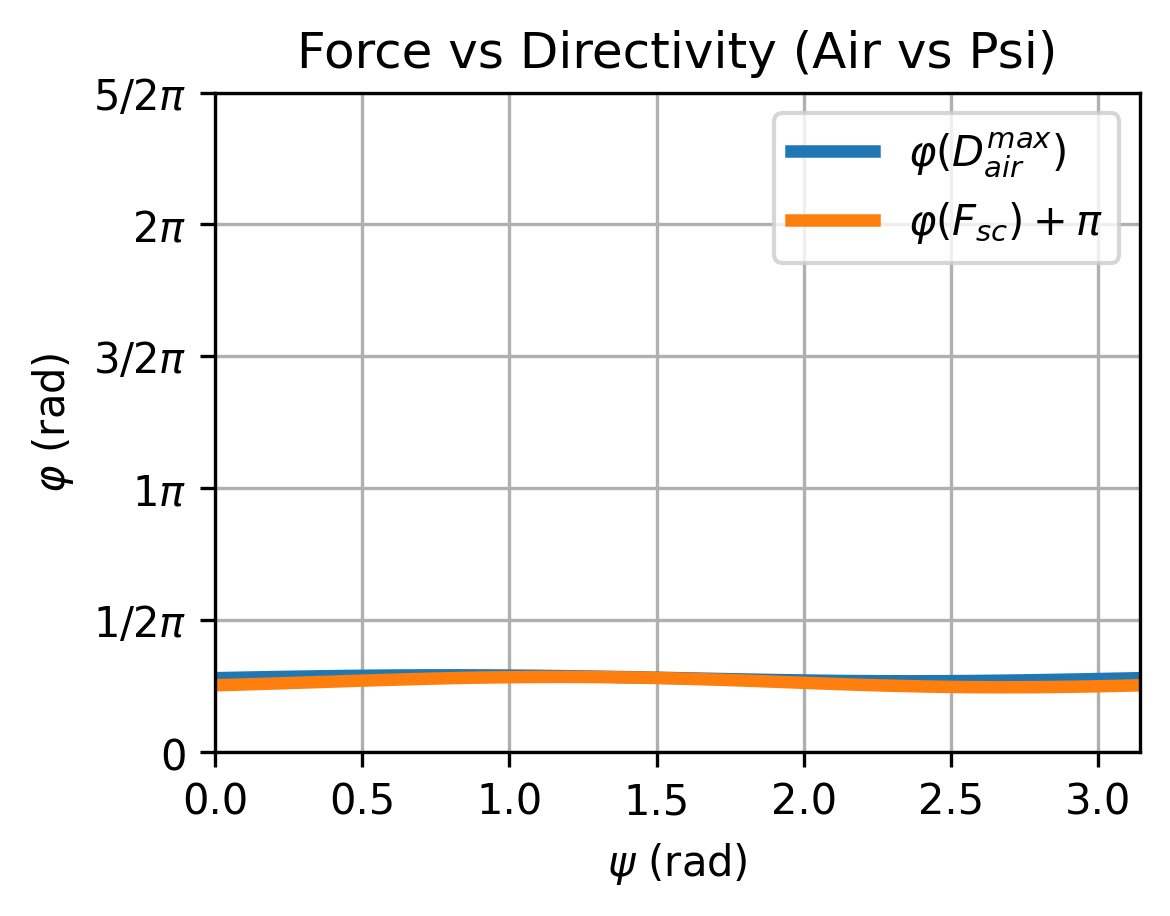

In [82]:
import pandas as pd

plot_force_directivity_comparison(
        diagrams_psi_reg, 
        sweep_psi, 
        param_col='psi', 
        param_label='$\\psi$ (rad)', 
        component='sc',
        title_suffix="(Air vs Psi)",
        max_method='complex',
        complex_par=1,
        ymax=5*np.pi/2, 
        ymin = 0,
        ytick_step=np.pi/2,
    )

Target psi: 0.33, Closest psi: 0.3173325912716963
-0.0014065437430761437


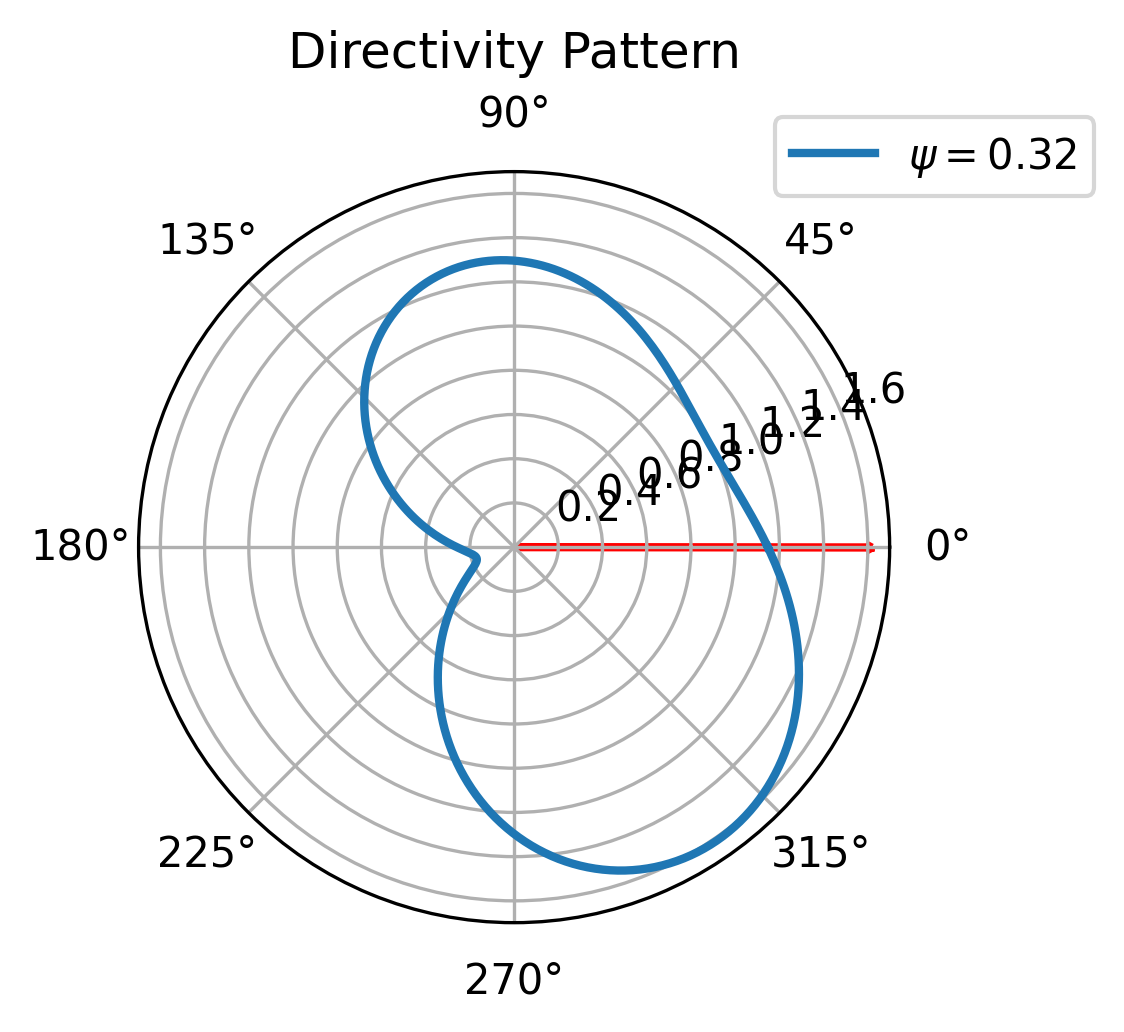

In [118]:
import numpy as np
import matplotlib.pyplot as plt

target_psi = 1.5

psi_values = diagrams_psi_reg['psi'].apply(lambda x: x.magnitude if hasattr(x, 'magnitude') else x).unique()
closest_psi = psi_values[np.argmin(np.abs(psi_values - target_psi))]
print(f"Target psi: {target_psi}, Closest psi: {closest_psi}")
temp_df = diagrams_psi_reg.copy()
temp_df['psi_val'] = temp_df['psi'].apply(lambda x: x.magnitude if hasattr(x, 'magnitude') else x)
subset = temp_df[temp_df['psi_val'] == closest_psi].copy()
subset['phi_val'] = subset['phi'].apply(lambda x: x.magnitude if hasattr(x, 'magnitude') else x)
subset['D_val'] = subset['D'].apply(lambda x: x.magnitude if hasattr(x, 'magnitude') else x)
subset = subset.sort_values('phi_val')
phi = subset['phi_val'].values
D = subset['D_val'].values

plt.figure(figsize=(4, 4), dpi=300)
ax = plt.subplot(111, polar=True)
ax.plot(phi, D, lw=2, label=f'$\\psi={closest_psi:.2f}$')
ax.set_title(f"Directivity Pattern")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
max_phi = np.angle(np.sum(D**4 * np.exp(1j * phi)))
# max_phi = phi[np.argmax(D)]
print(max_phi)
ax.arrow(0, 0, max_phi, np.max(D), color='red', lw=2, label='$\\varphi_{max}$')
plt.tight_layout()
plt.show()